# Lets Start

In [2]:
# SO THAT IT CAN BE RE-RUN
%load_ext autoreload
%autoreload 2

In [3]:
# Importing necessary libraries
import sys
import os
import numpy as np
import random
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import math,time,sys
from scipy.stats import expon
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier# training a DescisionTreeClassifier
from sklearn.naive_bayes import GaussianNB # training a Naive Bayes classifier
from sklearn.svm import SVC
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from csv import DictWriter
from os import getcwd, path, makedirs
from pandas import read_csv

# DEFINE GLOBAL VARIABLES 

In [4]:
# Parameters and global variables 
EOSA_PROBS_ID = 2
EOSA_INDIVIDUAL = 1
ID_POS = 0  # Index of position/location of solution/agent
ID_TAR = 1  # Index of target list, (includes fitness value and objectives list)
ID_FIT = 0  # Index of target (the final fitness) in fitness
ID_OBJ = 1  # Index of objective list in target
EPSILON = 10E-10
omega =  0.99
EOSA_ID_POS = 0
EOSA_ID_FIT = 1
ID_INDIVIDUAL=1
ID_INDIVIDUAL_INDEX=0
NEIGHBOURHOOD_THRESHHOLD=0.5
MIN_MAX_INFECTED_SOL=1
SEARCHABLE_LIMIT=0.1
π=0.1 #Recruitment rate of susceptible human individuals
ŋ=np.random.rand() #Decay rate of Ebola virus in the environment
α=np.random.rand() #Rate of hospitalization of infected individuals
dis=random.uniform(0.4, 0.9)#Disease-induced death rate of human individuals
β_1=0.1#Contact rate of infectious human individuals
β_2=0.1#Contact rate of pathogen individuals/environment
β_3=0.1#Contact rate of deceased human individuals
β_4=0.1#Contact rate of recovered human individuals
rr=np.random.rand() #Recovery rate of human individuals
dr=np.random.rand() #Natural death rate of human individuals
br=np.random.rand() #Rate of  burial of deceased human individuals
vr=np.random.rand() #Rate of vaccination of individuals
hr=np.random.rand() #Rate of response to hospital treatment
vrr=np.random.rand() #Rate response to vaccination
qrr=np.random.rand()	#Rate of quarantine of infected individuals

"""
Constants and values describing rates and variables
"""
'''
Settings from the paper
--------------------------------------------------------------------------------------------
 Notation       Definition                                                     Range of Value
--------------------------------------------------------------------------------------------
    π     Recruitment rate of susceptible human individuals                          Variable
    ŋ    Decay rate of Ebola virus in the environment                               (0, )
    α    Rate of hospitalization of infected individuals                               (0, 1)
        Disease-induced death rate of human individuals                               [0.4, 0.9]
    β1    Contact rate of infectious human individuals                               Variable
    β2    Contact rate of pathogen individuals/environment                           Variable
    β3    Contact rate of deceased human individuals                                   Variable
    β4    Contact rate of recovered human individuals                                   Variable
        Recovery rate of human individuals                                           (0, 1)
        Natural death rate of human individuals                                       (0, 1)
        Rate of  burial of deceased human individuals                               (0, 1)
        Rate of vaccination of individuals                                           (0, 1)
        Rate of response to hospital treatment                                       (0, 1)
        Rate response to vaccination                                               (0, 1)
'''
π=0.1 #Recruitment rate of susceptible human individuals
ŋ=np.random.rand() #Decay rate of Ebola virus in the environment
α=np.random.rand() #Rate of hospitalization of infected individuals
dis=random.uniform(0.4, 0.9)#Disease-induced death rate of human individuals
β_1=0.1#Contact rate of infectious human individuals
β_2=0.1#Contact rate of pathogen individuals/environment
β_3=0.1#Contact rate of deceased human individuals
β_4=0.1#Contact rate of recovered human individuals
rr=np.random.rand() #Recovery rate of human individuals
dr=np.random.rand() #Natural death rate of human individuals
br=np.random.rand() #Rate of  burial of deceased human individuals
vr=np.random.rand() #Rate of vaccination of individuals
hr=np.random.rand() #Rate of response to hospital treatment
vrr=np.random.rand() #Rate response to vaccination
qrr=np.random.rand()	#Rate of quarantine of infected individuals

modelrates = {
    "recruitment_rate": π,
    "decay_rate": ŋ,
    "hospitalization_rate": α,
    "disease_induced_death_rate": dis,
    "contact_rate_infectious": β_1,
    "contact_rate_pathogen": β_2,
    "contact_rate_deceased": β_3,
    "contact_rate_recovered": β_4,
    "recovery_rate": rr,
    "natural_death_rate": dr,
    "burial_rate": br,
    "vacination_rate": vr,
    "hospital_treatment_rate": hr,
    "vaccination_response_rate": vrr,
    "quarantine_rate": qrr
}
modelrates = {
    "recruitment_rate": π,
    "decay_rate": ŋ,
    "hospitalization_rate": α,
    "disease_induced_death_rate": dis,
    "contact_rate_infectious": β_1,
    "contact_rate_pathogen": β_2,
    "contact_rate_deceased": β_3,
    "contact_rate_recovered": β_4,
    "recovery_rate": rr,
    "natural_death_rate": dr,
    "burial_rate": br,
    "vacination_rate": vr,
    "hospital_treatment_rate": hr,
    "vaccination_response_rate": vrr,
    "quarantine_rate": qrr
}

'''
Paths to datasets files
'''
input_base_dir='../Dataset/' #

'''
'mias numpy files: 299X299'
all_mias_labels9 = os.path.join( "..", "..", "Dataset", 'miasNumpy', "train", "all_mias_labels9.npy")
all_mias_slices9 = os.path.join( "..", "..", "Dataset", 'miasNumpy', "train", "all_mias_slices9.npy")
mias_test_labels_enc= os.path.join( "..", "..", "Dataset", 'miasNumpy',"test", "test12_labels.npy")
mias_test_images = os.path.join( "..", "..", "Dataset", 'miasNumpy', "test", "test12_data.npy")
mias_val_labels_enc= os.path.join( "..", "..", "Dataset", 'miasNumpy',"val", "all_mias_labels.npy")
mias_val_images = os.path.join( "..", "..", "Dataset",  'miasNumpy',"val", "all_mias_slices.npy")


all_mias_labels9 = input_base_dir+'miasNumpy/train/all_mias_labels9.npy'
all_mias_slices9 = input_base_dir+'miasNumpy/train/all_mias_slices9.npy'
mias_test_labels_enc= input_base_dir+'miasNumpy/test/test12_labels.npy'
mias_test_images = input_base_dir+'miasNumpy/test/test12_data.npy'
mias_val_labels_enc= input_base_dir+'miasNumpy/val/all_mias_labels.npy'
mias_val_images = input_base_dir+'miasNumpy/val/all_mias_slices.npy'
'''

'ddsm tfrecords files: 299x299 images and labels in tfrecords format'
train_path_10 = os.path.join( "..", "..", "Dataset", "ddsmTFrecords", "training10_0", "training10_0.tfrecords")
train_path_11 = os.path.join( "..", "..", "Dataset", "ddsmTFrecords", "training10_1","training10_1.tfrecords")
train_path_12 = os.path.join( "..", "..", "Dataset", "ddsmTFrecords", "training10_2", "training10_2.tfrecords")
train_path_13 = os.path.join( "..", "..", "Dataset",  "ddsmTFrecords", "training10_3", "training10_3.tfrecords")
train_path_14 = os.path.join( "..", "..", "Dataset",  "ddsmTFrecords", "training10_4", "training10_4.tfrecords")

input_base_dir='./data/' #'/content/data/'
'mias image files: 299x299'
mias_input_dataset=input_base_dir+'mias/'


'ddsm image files: 299x299'
ddsm_input_dataset=input_base_dir+'ddsm/'

'histopathology image files'
histo_input_dataset=input_base_dir+'histo/'

'''
File and directory paths naming
'''
base_dir='./outputs/'  #'./outputs/' #
histo_checkpoint_path=base_dir+'checkpoints/histo/'
mammo_checkpoint_path=base_dir+'checkpoints/mammo/'
models_path=base_dir+'models/'
histo_model_filename='trainedmodelhisto'
mammo_model_filename='trainedmodelmammo'
save_results_dir=base_dir+'results/' 
save_histo_results_dir=save_results_dir+'training/histo/'
save_mammo_results_dir=save_results_dir+'training/mammo/'
metrics_dir=save_results_dir+'metrics/'
fusion_info_dir=save_results_dir+'fusiondata/'
optimize_fusion_info_dir=save_results_dir+'optimizedfusiondata/'

'''
General parameter settings
'''
show=1
batch_size=64
log_mode=1 
number_of_runs=1
cnn_epoch=40
train_split=0.75
test_split=0.15
eval_split=0.10
number_of_cnn_solutions=1
train_using_histo='histology'
train_using_mammo_ddsm='ddsm'
train_using_mammo_mias='mias'
isCombineMammoDatasets=False

'''
Image sizes
'''
histo_img_size={"width": 224, "height":224}
mammo_img_size={"width": 299, "height":299}

'''
Image channels
'''
histo_num_channels=3
mammo_num_channels=1

'''
Image labels
'''
histo_classes={"N":0, #normal (BACH dataset) 
         "B":1, #benign (BACH dataset) 
         "IS":2, #in situ carcinoma (BACH dataset)
         "IV":3, #invasive carcinoma, (BACH dataset)
         "A":4, #adenosis as benign (BreakHis dataset)
         "F":5, #fibroadenoma as benign (BreakHis dataset)
         "PT":6, #phyllodes tumor as benign (BreakHis dataset)
         "TA":7, #tubular adenona as benign (BreakHis dataset)
         "DC":8, #carcinoma as malignant (BreakHis dataset)
         "LC":9, #lobular carcinoma as malignant (BreakHis dataset)
         "MC":10, #mucinous carcinoma as malignant (BreakHis dataset)
         "PC":11 #papillary carcinoma as malignant (BreakHis dataset)
        }
histo_named_classes=["N","B","IS", "IV","A","F","PT", "TA", "DC", "LC", "MC","PC"]

#Mias image class info
mammo_mias_named_classes=['N', 'BC', 'BM', 'CALC', 'M']
mammo_mias_classes={0:'N', 1:'BC', 2:'BM', 3:'CALC', 4:'M'}

#DDSM image class info
mammo_ddsm_named_classes=['N', 'BC', 'BM', 'CALC', 'M']
mammo_ddsm_classes={0:'N', 1:'BC', 2:'BM', 3:'CALC', 4:'M'}


#seven(7) classes in MIAS numpy version
mias_numpy_classes=['CALC', #Calcification 
                  'CIRC', #Well-defined /circumscribed masses
                  'SPIC',  #Spiculated masses,
                  'M', #Other, ill-defined masses  MISC
                  'ARCH', #Architectural distortion
                  'ASY', #Asymmetry
                  'N',  #Normal
                  ]


'''
Definition of hyper-parameters
'''
learning_rates={0:1e-00, 1:1e-01, 2:1e-02, 3:1e-03, 4:1e-04, 5:1e-05, 6:1e-06, 7:1e-07, 8:1e-08,
                9:5e-00, 10:5e-01, 11:5e-02, 12:5e-03, 13:5e-04, 14:5e-05, 15:5e-06, 16:5e-07, 17:5e-08}

optimizers={0:"SGD", 1:"Adam", 2:"RMSprop", 3:"Adagrad", 4:"Nestrov", 5:"Adadelta", 6:"Adamax", 7:"Momentum"}

activations={0:"relu", 1:"leakyrelu", 2:"waveletdecompfunc"}

pooling={0:"Max", 1:"Avg"}

regularizers={0:"L1", 1:"L2", 2:"L1L2"}

fcactivations={0:"softmax"}

lossfunc={0: 'categorical_crossentropy', 1: 'sparse_categorical_crossentropy', 2: 'binary_crossentropy'}


'''
Binary optimization algorithms to use for experimentation
'''
binaryalgorithms=[ 'HBEOSA-DMO', 'HBEOSA-DMO-NT', 'HBEOSA-PSO', 'HBEOSA-PSO-NT', 'BEOSA','HBEOSA-ACO','HBEOSA-ACO-NT']

# All fitness function 

In [5]:
#all fitness functions
def EOSA_fitness(agent, trainX, testX, trainy, testy):
    
    cols=np.flatnonzero(agent)
    # print("number of cols",cols.shape,cols)
    val=1
    if np.shape(cols)[0]==0:
       return val, 1-val
    clf=KNeighborsClassifier(n_neighbors=5)
    train_data=trainX[:,cols]
    test_data=testX[:,cols]
    clf.fit(train_data,trainy)
    val=1-clf.score(test_data,testy)
    
    set_cnt=sum(agent)
    set_cnt=set_cnt/np.shape(agent)[0]
    val=omega*val+(1-omega)*set_cnt
    return val, 1-val

def fitness(agent, trainX, testX, trainy, testy):
    cols=np.flatnonzero(agent)
    #val=1

    if np.shape(cols)[0]==0:
       return val, 1-val
    
    clf=KNeighborsClassifier(n_neighbors=5)
    train_data=trainX[:,cols]
    test_data=testX[:,cols]
    clf.fit(train_data,trainy)
    val=1-clf.score(test_data,testy)
    set_cnt=sum(agent)
    set_cnt=set_cnt/np.shape(agent)[0]
    val=omega*val+(1-omega)*set_cnt
    return val, 1-val

def BDMO_fitness(agent, trainX, testX, trainy, testy):
    cols=np.flatnonzero(agent)
    #val=1
    if np.shape(cols)[0]==0:
       return val, 1-val
    
    clf=KNeighborsClassifier(n_neighbors=5)
    train_data=trainX[:,cols]
    test_data=testX[:,cols]
    clf.fit(train_data,trainy)
    val=1-clf.score(test_data,testy)
    set_cnt=sum(agent)
    set_cnt=set_cnt/np.shape(agent)[0]
    val=omega*val+(1-omega)*set_cnt
    return val, 1-val

def BDMO_allfit(pop, trainX, testX, trainy, testy):
    acc = np.zeros((len(pop), 1))
    cost = np.zeros((len(pop), 1))
    for p in range(len(pop)):
        acc[p], cost[p] = BDMO_fitness(pop[p], trainX, testX, trainy, testy)
    return acc, cost

def allfit(pop, trainX, testX, trainy, testy):
    fit = np.zeros((len(pop), 1))
    cost = np.zeros((len(pop), 1))
    for p in range(len(pop)):
        fit[p], cost[p] = fitness(pop[p], trainX, testX, trainy, testy)
    return fit, cost

def get_global_best(pop, id_fitness, id_best):
    minn = 100
    temp = pop[0]
    for i in pop:
        #print(i)
        #print(i[1])
        if isinstance(i[1], tuple):
            fit, cost=i[1]
        else:
            fit=i[1]
        minn = min(minn, fit)
        temp = i
    return temp

def sort_using_fitness(pops):
    ID_POP=0
    ID_ACC_COST=1
    ID_ACC=0
    ID_COST=1
    acc, cost, pop=[], [], []
    sorted_pop = sorted(pops, key=lambda agent: agent[ID_ACC_COST][ID_ACC])  
    for p in range(len(sorted_pop)):
        pop.append(sorted_pop[p][ID_POP])
        acc.append(sorted_pop[p][ID_ACC_COST][ID_ACC])
        cost.append(sorted_pop[p][ID_ACC_COST][ID_COST])
    return acc, cost, pop

def EOSA_allfit(pop, trainX, testX, trainy, testy):
    acc = []
    cost = []
    pops=[]
    for p in range(len(pop)):
        # print('about to see what is in pop[p]')
        # print(pop[p])
        
        idx, ind=pop[p]
        indX=ind[EOSA_ID_POS]
        # print(indX)
        ac, ct = EOSA_fitness(indX, trainX, testX, trainy, testy)
        acc.append(ac)
        cost.append(ct)
        ind[EOSA_ID_FIT]=ac #the actual fitness values
        pop[p]=idx, ind
        pops.append([pop[p], [ac, ct]])
    return sort_using_fitness(pops)


# Independent Methahuiristic algorithms

* DMO
* PSO
* ACO
* BSO



* SA
* FFA
* AEO
* Advanced Fish Swarm Algorithm Version 2
* Spiral Optimization Algorithm
* Snake optimization

In [6]:
#Metahuiristic algorithms

# • dmo
def RouletteWheelSelection(P):
    C=sum(P)
    r = np.random.uniform(low=0, high=C)
    for idx, f in enumerate(P):
            r = r + f
            if r > C:
                return idx
    return np.random.choice(range(0, len(P)))

def DMO(pop, fitAgent, trainX, testX, trainy, testy, dim, isNormalPop, Iter, MaxIter):
    pop_size=len(pop)
    if pop_size <= 5:
        return pop
    
    #Variable initialaization
    nVar=dim             #Number of Decision Variables
    VarSize=[]           #Decision Variables Matrix Size  1:nVar
    VarMin=0             #Decision Variables Lower Bound
    VarMax=1             #Decision Variables Upper Bound
    nBabysitter= 3         #Number of babysitters
    nAlphaGroup=pop_size - nBabysitter         #Number of Alpha group
    nScout=nAlphaGroup         #Number of Scouts
    L=round(0.6*nVar*nBabysitter)  #Babysitter Exchange Parameter 
    peep=1             #Alpha female \.12s vocalization 
    tau=random.uniform(0, 1)
    sm=[]
    TestaccG=None   
    
    Cost=[]
    if isNormalPop:
        _, Cost=BDMO_allfit(pop, trainX, testX, trainy, testy)
    else:
        for p in pop:
            Cost.append(p[EOSA_INDIVIDUAL][EOSA_ID_FIT])
        
    #Abandonment Counter
    C=np.zeros((nAlphaGroup,1))
    Iter=1
    CF=(1-Iter/MaxIter) ** (2*Iter/MaxIter)  #np.linalg.matrix_power((1-Iter/MaxIter), (2*Iter/MaxIter))

    #Alpha group
    F=np.zeros((nAlphaGroup,1))
    MeanCost = np.mean(Cost)
    for i in range(nAlphaGroup):
        # Calculate Fitness Values and Selection of Alpha
        F[i] = np.exp(-Cost[i]/MeanCost);   #Convert Cost to Fitness

    P=F/sum(F);
    
    #Foraging led by Alpha female
    for m in range(nAlphaGroup):
        i=RouletteWheelSelection(P) #Select Alpha female        
        #Choose k randomly, not equal to Alpha
        #K=np.empty([i-1, nAlphaGroup]) #1:i-1, i+1:nAlphaGroup  ???
        rand=random.randint(1, nAlphaGroup)  #random.randint(1, K.size)
        k=rand #K[rand]
        
        #Define Vocalization Coeff.
        phi=(peep/2) * np.random.uniform(-1,+1,VarSize)
        
        # New Mongoose Position
        newpop_Position=pop[i] + phi * (pop[i] - pop[k]) if isNormalPop else pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS] + phi * (pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS] - pop[k][EOSA_INDIVIDUAL][EOSA_ID_POS])
            
        #Check boundary VarMin,VarMax
        #         for j=1:size(X,2)   
        Flag_UB=newpop_Position > VarMax    #check if they exceed (up) the boundaries
        Flag_LB=newpop_Position < VarMin     #check if they exceed (down) the boundaries
        newpop_Position=(newpop_Position * (~(Flag_UB+Flag_LB))) + (VarMax * Flag_UB) + (VarMin * Flag_LB);

        #Evaluation
        newpop_Acc, newpop_Cost= BDMO_fitness(newpop_Position, trainX, testX, trainy, testy)  #CostFunction(X,Y,(newpop.Position > 0.5),HO); ???
            
        #Comparision
        if newpop_Cost <= Cost[i]:
            if isNormalPop:
                pop[i]=newpop_Position
            else:
                pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS]=newpop_Position
        else:
            C[i]=C[i]+1
                
    #Scout group
    for i in range(nScout):
        #Choose k randomly, not equal to i
        #K=np.empty([i-1, nAlphaGroup]) #1:i-1, i+1:nAlphaGroup ???
        rand=random.randint(1, nAlphaGroup)  #random.randint(1, K.size)
        k=rand #K[rand]
    
        #Define Vocalization Coeff.
        phi=(peep/2) * np.random.uniform(-1,+1,VarSize)
    
        #New Mongoose Position
        newpop_Position=pop[i] + phi * (pop[i] - pop[k]) if isNormalPop else pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS] + phi * (pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS] - pop[k][EOSA_INDIVIDUAL][EOSA_ID_POS])
        
        #Check boundary
        Flag_UB=newpop_Position > VarMax     #check if they exceed (up) the boundaries
        Flag_LB=newpop_Position < VarMin     #check if they exceed (down) the boundaries
        newpop_Position=(newpop_Position * (~(Flag_UB+Flag_LB))) + (VarMax * Flag_UB) + (VarMin * Flag_LB)
        
        #Evaluation
        newpop_Acc, newpop_Cost= BDMO_fitness(newpop_Position, trainX, testX, trainy, testy) #CostFunction(X,Y,(newpop.Position > 0.5),HO); ???
        
        #Sleeping mould
        sm.append((newpop_Cost - Cost[i])/max(newpop_Cost, Cost[i]))
        
        #Comparision
        if newpop_Cost <= Cost[i]:
            if isNormalPop:
                pop[i]=newpop_Position
            else:
                pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS]=newpop_Position
        else:
            C[i]=C[i] + 1
    
    #Babysitters
    for i in range(1, nBabysitter):
        newtau=np.mean(sm)
        if C[i] >= L:
            #pop (i).Position=unifrnd(VarMin,VarMax,VarSize);
            #pop (i).Cost=benchmark_functions(pop (i).Position,Function_name,dim);
            M=(pop[i] * sm)/pop[i] if isNormalPop else (pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS] * sm)/pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS]
            if newtau < tau:
                if isNormalPop:
                    newpop_Position=pop[i] - CF * phi * np.random.rand() * (pop[i] - M)
                else:
                    newpop_Position=pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS] - CF * phi * np.random.rand() * (pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS] - M)
            else:
               if isNormalPop:
                   newpop_Position=pop[i] + CF * phi * np.random.rand() * (pop[i] - M)
               else:
                   newpop_Position=pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS] + CF * phi * np.random.rand() * (pop[i][EOSA_INDIVIDUAL][EOSA_ID_POS] - M)
            tau=newtau
            Flag_UB=newpop_Position > VarMax     #% check if they exceed (up) the boundaries
            Flag_LB=newpop_Position < VarMin     #% check if they exceed (down) the boundaries
            newpop_Position=(newpop_Position * (~(Flag_UB+Flag_LB))) + (VarMax * Flag_UB) + (VarMin * Flag_LB)
            C[i]=0
            
    return pop

# • pso
#intermediate functions
#main PSO function
def PSO(agents, fitAgent, trainX, testX, trainy, testy, dim, isNormalPop, curIter, MaxIter):
    popSize=len(agents)
    velocity = np.zeros((popSize,dim))
    gbestVal = 1000
    C1 = 2
    C2 = 2
    WMAX = 0.9
    WMIN = 0.4
    gbestVec = np.zeros(popSize) #np.shape(agents[0]))
    pbestVal = np.zeros(popSize)
    pbestVec = np.zeros((popSize, dim))    
    for i in range(popSize):
        pbestVal[i] = 1000
    
    popnew = [] #np.zeros((popSize,dim))
    if isNormalPop:
        fitList = allfit(agents,trainX,trainy,testX,testy)
    else:
        fitList=[]
        for agent in agents:
            fitList.append(agent[EOSA_INDIVIDUAL][EOSA_ID_FIT])
    
    #update pbest
    for i in range(popSize):
        if (fitList[i] < pbestVal[i]):
            pbestVal[i] = fitList[i]
            #print(np.shape(agents[0][EOSA_INDIVIDUAL][EOSA_ID_POS]))
            #print(agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS])
            pbestVec[i] = np.array(agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS]) #.copy()
            #agents[i].copy() if isNormalPop else 
    #update gbest
    for i in range(popSize):
        if (fitList[i] < gbestVal):
            gbestVal = fitList[i]
            gbestVec = agents[i].copy() if isNormalPop else (agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS]).copy()
    
    #update W
    W = WMAX - (curIter/MaxIter)*(WMAX - WMIN )
    # print("w: ",W)
    ychosen , zchosen = 0 , 0
    for inx in range(popSize):
        #inx <- particle index
        random.seed(time.time()+10)
        r1 = C1 * random.random()
        random.seed(time.time()+19)
        r2 = C2 * random.random()
        
        if isNormalPop:
            x = np.subtract(pbestVec[inx] , agents[inx])
        else:
            x = np.subtract(pbestVec[inx] , agents[inx][EOSA_INDIVIDUAL][EOSA_ID_POS])
        
        if isNormalPop:
            y = np.subtract(gbestVec , agents[inx])
        else:
            y = np.subtract(gbestVec , agents[inx][EOSA_INDIVIDUAL][EOSA_ID_POS])

        velocity[inx] = np.multiply(W,velocity[inx]) + np.multiply(r1,x) + np.multiply(r2,y)

        if isNormalPop:
            popnew[inx] = np.add(agents[inx],velocity[inx])
        else:
            position=np.add(agents[inx][EOSA_INDIVIDUAL][EOSA_ID_POS],velocity[inx])    
            index, _=agents[inx]
            fit, cost=EOSA_fitness(position, trainX, testX, trainy, testy)
            individual=index, [position, fit]
            popnew.append(individual)

    agents = popnew.copy()

    return agents

# • (ACO) ant colony optimization (ACO) algorithm for feature selection
#intermediate functions
def construct_ant_solution(pheromone, dim, alpha, beta):
    """Construct a solution using ACO probability rules"""
    solution = np.zeros(dim, dtype=int)
    
    # Calculate heuristic information (inverse of feature index for diversity)
    heuristic = np.array([1.0 / (i + 1) for i in range(dim)])
    
    # For each feature, decide whether to include it
    for i in range(dim):
        # Calculate probability of selecting feature i
        tau = pheromone[i] ** alpha
        eta = heuristic[i] ** beta
        
        # Probability of selecting this feature
        prob_select = tau * eta / (tau * eta + (1 - pheromone[i]) ** alpha)
        
        # Stochastic selection
        random.seed(time.time() + i)
        if random.random() < prob_select:
            solution[i] = 1
    
    # Ensure at least one feature is selected
    if np.sum(solution) == 0:
        random.seed(time.time())
        random_idx = random.randint(0, dim - 1)
        solution[random_idx] = 1
    
    return solution
def update_pheromone(pheromone, agents, fitList, isNormalPop, rho, Q, tau_min, tau_max, dim):
    """Update pheromone trails based on ant solutions and their fitness"""
    
    # Evaporation
    pheromone *= (1 - rho)
    
    # Find best and worst fitness for normalization
    best_fit = min(fitList)
    worst_fit = max(fitList)
    
    # Add pheromone based on solution quality
    for i, agent in enumerate(agents):
        if isNormalPop:
            solution = agent
        else:
            solution = agent[EOSA_INDIVIDUAL][EOSA_ID_POS]
        
        # Calculate pheromone deposit (higher for better solutions)
        if worst_fit != best_fit:
            fitness_ratio = (worst_fit - fitList[i]) / (worst_fit - best_fit)
        else:
            fitness_ratio = 1.0
        
        delta_tau = Q * fitness_ratio
        
        # Update pheromone for selected features
        for j in range(dim):
            if solution[j] == 1:
                pheromone[j] += delta_tau
    
    # Apply pheromone bounds
    pheromone = np.clip(pheromone, tau_min, tau_max)
    
    # Update the class variable
    ACO.pheromone = pheromone

def reset_ACO():
    """Reset ACO static variables (call between different runs)"""
    if hasattr(ACO, 'pheromone'):
        delattr(ACO, 'pheromone')
    if hasattr(ACO, 'best_solution'):
        delattr(ACO, 'best_solution')
    if hasattr(ACO, 'best_fitness'):
        delattr(ACO, 'best_fitness')

# main algorithm 
def ACO(agents, fitAgent, trainX, testX, trainy, testy, dim, isNormalPop, curIter, MaxIter):
    popSize = len(agents)
    reset_ACO()
    
    # ACO Parameters
    ALPHA = 1.0      # Pheromone importance
    BETA = 2.0       # Heuristic importance
    RHO = 0.5        # Evaporation rate
    Q = 100          # Pheromone constant
    TAU_MIN = 0.01   # Minimum pheromone
    TAU_MAX = 6.0    # Maximum pheromone
    
    # Initialize pheromone matrix if this is first iteration
    if not hasattr(ACO, 'pheromone'):
        ACO.pheromone = np.full(dim, 0.5)  # Initial pheromone levels
    
    # Initialize best solution tracking
    if not hasattr(ACO, 'best_solution'):
        ACO.best_solution = None
        ACO.best_fitness = float('inf')
    
    # Get fitness values
    if isNormalPop:
        fitList = allfit(agents, trainX, trainy, testX, testy)
    else:
        fitList = []
        for agent in agents:
            fitList.append(agent[EOSA_INDIVIDUAL][EOSA_ID_FIT])
    
    # Update global best solution
    for i in range(popSize):
        current_fitness = fitList[i]
        if current_fitness < ACO.best_fitness:
            ACO.best_fitness = current_fitness
            if isNormalPop:
                ACO.best_solution = agents[i].copy()
            else:
                ACO.best_solution = agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
    
    # Generate new population of ants
    new_agents = []
    
    for ant_idx in range(popSize):
        # Construct solution using pheromone-based probabilistic selection
        new_solution = construct_ant_solution(ACO.pheromone, dim, ALPHA, BETA)
        
        if isNormalPop:
            new_agents.append(new_solution)
        else:
            # Calculate fitness for new solution
            fit, cost = EOSA_fitness(new_solution, trainX, testX, trainy, testy)
            index, _ = agents[ant_idx]
            individual = index, [new_solution, fit]
            new_agents.append(individual)
    
    # Update pheromone trails
    update_pheromone(ACO.pheromone, agents, fitList, isNormalPop, 
                    RHO, Q, TAU_MIN, TAU_MAX, dim)
    
    return new_agents


#  ™ (BSO) Next algorithms  For Binary snake optimization
def _hamming_distance(snake1, snake2):
    """Calculate Hamming distance between two binary vectors"""
    return np.sum(snake1 != snake2)

def _sigmoid_transfer(x, Q):
    """S-shaped transfer function for distance mapping"""
    return 1 / (np.exp(-x / Q) + 1)

def _gaussian_mutation_transfer(value):
    """Gaussian mutation transfer function"""
    gauss = np.random.normal(0.5, 0.25)
    return 1 if gauss < value else 0

def _exploration_phase(population, fitness_values, c2):
    """Exploration phase when Q < threshold_food"""
    n_snakes, n_features = population.shape
    new_population = population.copy()
    
    for i in range(n_snakes):
        # Select random individual from same group (male/female)
        group_size = n_snakes // 2
        if i < group_size:  # Male group
            rand_idx = random.randint(0, group_size - 1)
        else:  # Female group  
            rand_idx = random.randint(group_size, n_snakes - 1)
        
        # Calculate A factor (Equation 7)
        if fitness_values[i] != 0:
            A = np.exp(fitness_values[rand_idx] / fitness_values[i])
        else:
            A = 1
        
        # Update position dimension by dimension (Equation 19)
        for j in range(n_features):
            random.seed(time.time() + i * n_features + j)
            update_prob = c2 * A * random.random()
            if random.random() < update_prob:
                new_population[i, j] = population[rand_idx, j]
    
    return new_population

def _exploitation_phase_high_temp(population, best_position, temp, Q, c3):
    """Exploitation phase when Temp > threshold_temp"""
    n_snakes, n_features = population.shape
    new_population = population.copy()
    
    for i in range(n_snakes):
        hamming_dist = _hamming_distance(best_position, population[i])
        S_value = _sigmoid_transfer(hamming_dist, Q)
        
        for j in range(n_features):
            if population[i, j] == best_position[j]:
                # Keep same dimension unchanged (Equation 24)
                new_population[i, j] = population[i, j]
            else:
                # Calculate H factor and update (Equation 25)
                H = c3 * temp * random.random() * S_value
                if random.random() < H:
                    new_population[i, j] = best_position[j]
    
    return new_population

def _exploitation_phase_low_temp(population, fitness_values, temp, Q, c3):
    """Exploitation phase when Temp < threshold_temp (Fight and Mating modes)"""
    # print('Exploitation phase when Temp < threshold_temp (Fight and Mating modes')
    n_snakes, n_features = population.shape
    new_population = population.copy()
    
    # Split into male and female groups
    n_males = n_snakes // 2
    n_females = n_snakes - n_males
    
    male_fitness = fitness_values[:n_males]
    female_fitness = fitness_values[n_males:]
    # print("Male fitness array shape:", male_fitness.shape)
    # print("Female fitness array shape:", female_fitness.shape)
    
    # Find best in each group
    # print("separate and find best male and female")
    best_male_idx = np.argmin(male_fitness)
    best_female_idx = np.argmin(female_fitness)
    best_male = population[best_male_idx]
    best_female = population[n_males + best_female_idx]
    
    # Update males
    for i in range(n_males):
        if random.random() < 0.5:  # Fight mode
            if male_fitness[i] != 0:
                F = np.exp(female_fitness[best_female_idx] / male_fitness[i])
            else:
                F = 1
            
            for j in range(n_features):
                update_prob = c3 * F * random.random() * Q
                if random.random() < update_prob:
                    new_population[i, j] = best_female[j]
        else:  # Mating mode
            partner_idx = random.randint(n_males, n_snakes - 1)
            
            if male_fitness[i] != 0:
                M = np.exp(fitness_values[partner_idx] / male_fitness[i])
            else:
                M = 1
            
            for j in range(n_features):
                update_prob = c3 * M * random.random() * Q
                if random.random() < update_prob:
                    new_population[i, j] = population[partner_idx, j]
    
    # Update females
    for i in range(n_females):
        actual_idx = i + n_males
        if random.random() < 0.5:  # Fight mode
            if female_fitness[i] != 0:
                F = np.exp(male_fitness[best_male_idx] / female_fitness[i])
            else:
                F = 1
            
            for j in range(n_features):
                update_prob = c3 * F * random.random() * Q
                if random.random() < update_prob:
                    new_population[actual_idx, j] = best_male[j]
        else:  # Mating mode
            partner_idx = random.randint(0, n_males - 1)
            
            if female_fitness[i] != 0:
                M = np.exp(male_fitness[partner_idx] / female_fitness[i])
            else:
                M = 1
            
            for j in range(n_features):
                update_prob = c3 * M * random.random() * Q
                if random.random() < update_prob:
                    new_population[actual_idx, j] = population[partner_idx, j]
    
    return new_population

def _apply_gaussian_mutation_transfer(population):
    """Apply Gaussian mutation transfer function to convert continuous to binary"""
    n_snakes, n_features = population.shape
    binary_population = np.zeros_like(population)
    
    for i in range(n_snakes):
        for j in range(n_features):
            binary_population[i, j] = _gaussian_mutation_transfer(population[i, j])
    
    return binary_population

def BSO(agents, fitAgent, trainX, testX, trainy, testy, dim, isNormalPop, curIter, MaxIter):
    """
    Binary Snake Optimizer adapted to match your PSO interface
    
    Parameters:
    - agents: Population of agents in your EOSA format
    - fitAgent: Not used, kept for interface compatibility
    - trainX, testX, trainy, testy: Training and testing data
    - dim: Number of features (dimensions)
    - isNormalPop: Should be False for EOSA format
    - curIter: Current iteration
    - MaxIter: Maximum iterations
    
    Returns:
    - Updated agents list
    """

    # BSO Algorithm constants
    c1 = 0.5      # Equation 5: Q = c1 * exp((t-T)/T)
    c2 = 0.05     # Equation 6: exploration phase constant
    c3 = 2        # Equation 8: exploitation phase constant
    threshold_temp = 0.6   # Temperature threshold
    threshold_food = 0.25  # Food threshold
    
    popSize = len(agents)
    
    # Extract positions and fitness values
    population = np.zeros((popSize, dim))
    fitness_values = np.zeros(popSize)
    
    for i in range(popSize):
        if isNormalPop:
            population[i] = agents[i]
            # Calculate fitness if needed
            fitness_values[i], _ = EOSA_fitness(agents[i], trainX, testX, trainy, testy)
        else:
            population[i] = agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS]
            fitness_values[i] = agents[i][EOSA_INDIVIDUAL][EOSA_ID_FIT]
    
    # Convert to binary space
    binary_population = np.zeros_like(population)
    for i in range(popSize):
        for j in range(dim):
            binary_population[i, j] = 1 if population[i, j] > 0.5 else 0
    
    # Find best solution
    best_idx = np.argmin(fitness_values)
    best_position = binary_population[best_idx].copy()
    
    # Update temperature and food quantity (Equations 4-5)
    t = curIter  # Convert to 0-based indexing
    temp = np.exp(-t / MaxIter)
    Q = c1 * np.exp((t - MaxIter) / MaxIter)
    # print("Q_values",Q, "temp_values", temp,"t",t,"MaxIter",MaxIter)
    # Choose optimization phase based on food quantity
    if Q < threshold_food:
        # print("Exploration phase (Q < threshold_food)")
        # Exploration phase (Section 5.3)
        binary_population = _exploration_phase(binary_population, fitness_values, c2)
    else:
        # print("Exploitation phases")
        if temp > threshold_temp  or binary_population.shape[0] < 2:
            # print("Exploitation phase (Temp > threshold_temp)")
            # High temperature exploitation (Section 5.4)
            binary_population = _exploitation_phase_high_temp(
                binary_population, best_position, temp, Q, c3
            )
        else:
            # print("Low temperature exploitation (Temp < threshold_temp)")
            # Low temperature exploitation - Fight/Mating (Section 3)
            binary_population = _exploitation_phase_low_temp(
                binary_population, fitness_values, temp, Q, c3
            )
            
            # Replace worst individual with newborn
            worst_idx = np.argmax(fitness_values)
            for j in range(dim):
                binary_population[worst_idx, j] = 1 if random.random() > 0.5 else 0
    
    # Apply Gaussian mutation transfer function
    binary_population = _apply_gaussian_mutation_transfer(binary_population)
    
    # Convert back to continuous space and update agents
    popnew = []
    
    for i in range(popSize):
        # Convert binary to continuous (for compatibility with your system)
        continuous_pos = binary_population[i].astype(float)
        
        if isNormalPop:
            popnew.append(continuous_pos)
        else:
            # Calculate new fitness
            fit, cost = EOSA_fitness(continuous_pos, trainX, testX, trainy, testy)
            
            # Maintain agent structure
            index, _ = agents[i]
            individual = index, [continuous_pos, fit]
            popnew.append(individual)
    
    return popnew


## • Simulated Anealing

#intermediate functions
def randomwalk(agent):
    percent = 30
    percent /= 100
    neighbor = agent[EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
    size = np.shape(agent[EOSA_INDIVIDUAL][EOSA_ID_POS])[0]
    upper = int(percent*size)
    if upper <= 1:
        upper = size
    x = random.randint(1,upper)
    realsize=size - 1 #if (x > size -1) else x - 2
    alist=range(0,realsize)
    pos = random.sample(alist, min(x, len(alist)-1))
    for i in pos:
        neighbor[i] = 1 - neighbor[i]
    agent[EOSA_INDIVIDUAL][EOSA_ID_POS]=neighbor
    return agent

# Main algorithm
def SA(agents, fitAgent, trainX, testX, trainy, testy, dim, isNormalPop,curIter, MaxIter):
    # initialise temprature
    T = 4*len(agents[0][EOSA_INDIVIDUAL][EOSA_ID_POS])
    T0 = 2*len(agents[0][EOSA_INDIVIDUAL][EOSA_ID_POS])
    S = agents[0] #[EOSA_INDIVIDUAL][EOSA_ID_POS].copy();
    bestSolution = agents[0]  #.copy();
    bestFitness = agents[0][EOSA_INDIVIDUAL][EOSA_ID_FIT];
        
    for agent in agents:
        while T > T0:
            neighbor = randomwalk(S)
            neighborFitness, cost = EOSA_fitness(neighbor[EOSA_INDIVIDUAL][EOSA_ID_POS], trainX, testX, trainy, testy)
            if neighborFitness < bestFitness:
                S = neighbor #.copy()
                bestSolution = neighbor  #.copy()
                bestFitness = neighborFitness
            elif neighborFitness == bestFitness:
                if np.sum(neighbor[EOSA_INDIVIDUAL][EOSA_ID_POS]) == np.sum(bestSolution[EOSA_INDIVIDUAL][EOSA_ID_POS]):
                    S = neighbor #.copy()
                    bestSolution = neighbor #.copy()
                    bestFitness = neighborFitness
            else:
                theta = neighborFitness - bestFitness
                if np.random.rand() < math.exp(-1*(theta/T)):
                    S = neighbor #.copy()
            T *= 0.925
            agent[EOSA_INDIVIDUAL][EOSA_ID_FIT]=bestFitness
            agent[EOSA_INDIVIDUAL][EOSA_ID_POS]=bestSolution[EOSA_INDIVIDUAL][EOSA_ID_POS]
    return agents 

#  • Firefly Algorithm (FFA)

# intermediate functions
def compare_agent(agent_a, agent_b, minmax):
    if minmax == "min":
        if agent_a < agent_b:
            return True
        return False
    else:
        if agent_a < agent_b:
            return False
        return True

def get_global_best_solution_norm_pop(pop):
    sorted_pop = sorted(pop)#, key=lambda agent: agent[id_individual][EOSA_ID_FIT])  
    best=sorted_pop[0]
    return sorted_pop, best 

def get_global_best_solution(pop):
    id_individual=1
    sorted_pop = sorted(pop, key=lambda agent: agent[id_individual][EOSA_ID_FIT])  
    best=sorted_pop[0]
    return sorted_pop, best 

# main algorithm
def FFA(agents, g_best, trainX, testX, trainy, testy, dim, isNormalPop,curIter, MaxIter):
    pop_size=len(agents)
    gamma = 0.001
    beta_base = 2
    alpha = 0.2
    alpha_damp = 0.99
    delta = 0.05
    exponent = 2    
    dmax = np.sqrt(dim) # Maximum Distance
    minmax = "min"
    for idx in range(0, pop_size):
        agent = agents[idx]
        pop_child = []
        for j in range(idx + 1, pop_size):
            # Move Towards Better Solutions
            if isNormalPop:
                fitA, costA=fitness(agents[j], trainX, testX, trainy, testy)
                fitB, costB=fitness(agent, trainX, testX, trainy, testy)
            else:
                fitA=agents[j][EOSA_INDIVIDUAL][EOSA_ID_FIT]
                fitB=agents[j][EOSA_INDIVIDUAL][EOSA_ID_FIT]
            agentA_fit, agentB_fit=fitA, fitB,
            if compare_agent(agentA_fit, agentB_fit, minmax):
                # Calculate Radius and Attraction Level
                rij = np.linalg.norm(agent - (agents[j] if isNormalPop  else agents[j][EOSA_INDIVIDUAL][EOSA_ID_POS])) / dmax
                beta = beta_base * np.exp(-gamma * rij ** exponent)
                # Mutation Vector
                mutation_vector = delta * np.random.uniform(0, 1, dim)
                temp = np.matmul(((agents[j] if isNormalPop  else agents[j][EOSA_INDIVIDUAL][EOSA_ID_POS]) - agent), np.random.uniform(0, 1, (dim, dim)))
                pos_new = agent + dyn_alpha * mutation_vector + beta * temp
                pop_child.append(pos_new)
        if len(pop_child) < 2:
            continue
        _, local_best = get_global_best_solution_norm_pop(pop_child) if isNormalPop  else get_global_best_solution(pop_child)
        # Compare to Previous Solution
        if compare_agent(local_best, agent, minmax):
            if isNormalPop:
                agents[idx]= local_best
            else:
                agents[idx][EOSA_INDIVIDUAL][EOSA_ID_POS] = local_best
    agents.append(g_best)
    dyn_alpha = alpha_damp * alpha
    return agents


# def AEO(agents, fitAgent, trainX, testX, trainy, testy, dim, isNormalPop, curIter, MaxIter):
#     """
#     Ecosystem-based Optimization Algorithm (AEO)
#     Based on producer, consumer, and decomposer behaviors in an ecosystem
#     """
#     popSize = len(agents)
    
#     # Initialize population if needed
#     if isNormalPop:
#         fitList = allfit(agents, trainX, trainy, testX, testy)
#     else:
#         fitList = []
#         for agent in agents:
#             fitList.append(agent[EOSA_INDIVIDUAL][EOSA_ID_FIT])
    
#     # Find best solution
#     best_idx = np.argmin(fitList)
#     if isNormalPop:
#         best_solution = agents[best_idx].copy()
#     else:
#         best_solution = agents[best_idx][EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
    
#     # Calculate C1 parameter (linearly decreasing)
#     C1 = 2 - (2 * curIter / MaxIter)
    
#     popnew = []
    
#     for i in range(popSize):
#         if isNormalPop:
#             current_pos = agents[i].copy()
#         else:
#             current_pos = agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
        
#         new_pos = np.zeros(dim)
        
#         # Producer behavior (exploitation around best solution)
#         if random.random() < 0.4:  # 40% producers
#             for j in range(dim):
#                 r = random.random()
#                 if r < 0.5:
#                     new_pos[j] = best_solution[j] + C1 * random.random() * (best_solution[j] - current_pos[j])
#                 else:
#                     new_pos[j] = best_solution[j] - C1 * random.random() * (best_solution[j] - current_pos[j])
        
#         # Consumer behavior (following other agents)
#         elif random.random() < 0.8:  # 40% consumers
#             rand_idx = random.randint(0, popSize - 1)
#             if isNormalPop:
#                 rand_pos = agents[rand_idx]
#             else:
#                 rand_pos = agents[rand_idx][EOSA_INDIVIDUAL][EOSA_ID_POS]
            
#             for j in range(dim):
#                 new_pos[j] = current_pos[j] + random.random() * (rand_pos[j] - current_pos[j])
        
#         # Decomposer behavior (exploration)
#         else:  # 20% decomposers
#             for j in range(dim):
#                 new_pos[j] = random.random()
        
#         # Boundary control
#         new_pos = np.clip(new_pos, 0, 1)
        
#         if isNormalPop:
#             popnew.append(new_pos)
#         else:
#             fit, cost = EOSA_fitness(new_pos, trainX, testX, trainy, testy)
#             index, _ = agents[i]
#             individual = index, [new_pos, fit]
#             popnew.append(individual)
    
#     return popnew
 
# # Assuming constants are defined elsewhere, consistent with FFA
# EOSA_INDIVIDUAL = 0
# EOSA_ID_POS = 0
# EOSA_ID_FIT = 1

# # Helper functions AEO
def compare_agent(agent_a, agent_b, minmax):
    if minmax == "max":
        return agent_a > agent_b
    else:
        return agent_a < agent_b

def get_position(agent, isNormalPop):
    if isNormalPop:
        return agent
    else:
        return agent[EOSA_INDIVIDUAL][EOSA_ID_POS]

def get_fitness(agent, isNormalPop, trainX, testX, trainy, testy):
    if isNormalPop:
        return fitness(agent, trainX, testX, trainy, testy)[0]  # Assuming fitness returns (fit, cost)
    else:
        return agent[EOSA_INDIVIDUAL][EOSA_ID_FIT]

# AEO Algorithm
def AEO(agents, g_best, trainX, testX, trainy, testy, dim, isNormalPop, curIter, MaxIter):
    pop_size = len(agents)
    minmax = "min"  # For feature selection, usually minimization

    # AEO parameters
    a = 1.0
    c = 0.5
    d = 0.1
    p_producer = 0.2
    p_consumer = 0.6
    p_decomposer = 0.2

    # Consumption sub-phase probabilities
    herbivore_prob = 0.4
    carnivore_prob = 0.3
    omnivore_prob = 0.3

    # Get global best position
    g_best_pos = get_position(g_best, isNormalPop)

    # Compute fitness list
    if isNormalPop:
        fitness_list = [fitness(agent, trainX, testX, trainy, testy)[0] for agent in agents]
    else:
        fitness_list = [agent[EOSA_INDIVIDUAL][EOSA_ID_FIT] for agent in agents]

    # Sort indices for role assignment
    sorted_indices = np.argsort(fitness_list)  # ascending for minimization
    k = max(1, int(p_producer * pop_size))
    m = max(1, int(p_consumer * pop_size))
    if k + m > pop_size:
        m = pop_size - k
    n = pop_size - k - m
    producer_indices = sorted_indices[:k]
    consumer_indices = sorted_indices[k:k+m]
    decomposer_indices = sorted_indices[k+m:]

    for i in range(pop_size):
        pos = get_position(agents[i], isNormalPop)

        if i in producer_indices:
            # Production: generate new position around global best
            new_pos = g_best_pos + a * (np.random.rand(dim) * 2 - 1)

        elif i in consumer_indices:
            r = np.random.rand()
            if len(producer_indices) == 0:
                new_pos = pos
            elif r < herbivore_prob:
                # Herbivore: move towards a random producer
                p_idx = np.random.choice(producer_indices)
                p_pos = get_position(agents[p_idx], isNormalPop)
                new_pos = pos + c * (p_pos - pos)
            elif r < herbivore_prob + carnivore_prob:
                # Carnivore: move towards a random other consumer
                other_consumers = [idx for idx in consumer_indices if idx != i]
                if other_consumers:
                    c_idx = np.random.choice(other_consumers)
                    c_pos = get_position(agents[c_idx], isNormalPop)
                    new_pos = pos + c * (c_pos - pos)
                else:
                    new_pos = pos
            else:
                # Omnivore: move towards a producer or consumer
                if np.random.rand() < 0.5 and len(producer_indices) > 0:
                    p_idx = np.random.choice(producer_indices)
                    p_pos = get_position(agents[p_idx], isNormalPop)
                    new_pos = pos + c * (p_pos - pos)
                else:
                    other_consumers = [idx for idx in consumer_indices if idx != i]
                    if other_consumers:
                        c_idx = np.random.choice(other_consumers)
                        c_pos = get_position(agents[c_idx], isNormalPop)
                        new_pos = pos + c * (c_pos - pos)
                    else:
                        new_pos = pos
        else:
            # Decomposer: add random perturbation
            new_pos = pos + d * (np.random.rand(dim) * 2 - 1)

        # Clip and update position
        new_pos = np.clip(new_pos, 0, 1)
        if isNormalPop:
            agents[i] = new_pos
        else:
            agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS] = new_pos

    # Recalculate fitness
    if isNormalPop:
        fitness_list = [fitness(agent, trainX, testX, trainy, testy)[0] for agent in agents]
    else:
        for agent in agents:
            pos = agent[EOSA_INDIVIDUAL][EOSA_ID_POS]
            fit, cost = fitness(pos, trainX, testX, trainy, testy)
            agent[EOSA_INDIVIDUAL][EOSA_ID_FIT] = fit
        fitness_list = [agent[EOSA_INDIVIDUAL][EOSA_ID_FIT] for agent in agents]

    # Update global best if better found
    best_idx = np.argmin(fitness_list)
    best_agent = agents[best_idx]
    best_fit = fitness_list[best_idx]

    g_best_fit = get_fitness(g_best, isNormalPop, trainX, testX, trainy, testy)
    if compare_agent(best_fit, g_best_fit, minmax):
        g_best = (best_agent[0], [np.copy(best_agent[1][0]), best_agent[1][1]])

    return agents
   

def AFSA2(agents, fitAgent, trainX, testX, trainy, testy, dim, isNormalPop, curIter, MaxIter):
    """
    Advanced Fish Swarm Algorithm Version 2 (AFSA-2)
    Simulates fish behaviors: preying, swarming, following, and random movement
    """
    popSize = len(agents)
    visual = 0.3  # Visual distance
    step = 0.1    # Step size
    try_number = 5  # Number of trials
    
    if isNormalPop:
        fitList = allfit(agents, trainX, trainy, testX, testy)
    else:
        fitList = []
        for agent in agents:
            fitList.append(agent[EOSA_INDIVIDUAL][EOSA_ID_FIT])
    
    popnew = []
    
    for i in range(popSize):
        if isNormalPop:
            current_pos = agents[i].copy()
        else:
            current_pos = agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
        
        current_fitness = fitList[i]
        best_pos = current_pos.copy()
        best_fitness = current_fitness
        
        # Preying behavior
        for _ in range(try_number):
            new_pos = current_pos + step * (2 * np.random.random(dim) - 1)
            new_pos = np.clip(new_pos, 0, 1)
            
            if isNormalPop:
                new_fitness, _ = fitness(new_pos, trainX, testX, trainy, testy)
            else:
                new_fitness, _ = EOSA_fitness(new_pos, trainX, testX, trainy, testy)
            
            if new_fitness < best_fitness:
                best_pos = new_pos
                best_fitness = new_fitness
        
        # Swarming behavior
        neighbors = []
        for j in range(popSize):
            if i != j:
                if isNormalPop:
                    other_pos = agents[j]
                else:
                    other_pos = agents[j][EOSA_INDIVIDUAL][EOSA_ID_POS]
                
                distance = np.linalg.norm(current_pos - other_pos)
                if distance < visual:
                    neighbors.append((other_pos, fitList[j]))
        
        if neighbors:
            center = np.mean([pos for pos, _ in neighbors], axis=0)
            avg_fitness = np.mean([fit for _, fit in neighbors])
            
            if avg_fitness < current_fitness:
                direction = center - current_pos
                new_pos = current_pos + step * direction / (np.linalg.norm(direction) + 1e-8)
                new_pos = np.clip(new_pos, 0, 1)
                
                if isNormalPop:
                    new_fitness, _ = fitness(new_pos, trainX, testX, trainy, testy)
                else:
                    new_fitness, _ = EOSA_fitness(new_pos, trainX, testX, trainy, testy)
                
                if new_fitness < best_fitness:
                    best_pos = new_pos
                    best_fitness = new_fitness
        
        # Following behavior
        if neighbors:
            best_neighbor = min(neighbors, key=lambda x: x[1])
            neighbor_pos, neighbor_fitness = best_neighbor
            
            if neighbor_fitness < current_fitness:
                direction = neighbor_pos - current_pos
                new_pos = current_pos + step * direction / (np.linalg.norm(direction) + 1e-8)
                new_pos = np.clip(new_pos, 0, 1)
                
                if isNormalPop:
                    new_fitness, _ = fitness(new_pos, trainX, testX, trainy, testy)
                else:
                    new_fitness, _ = EOSA_fitness(new_pos, trainX, testX, trainy, testy)
                
                if new_fitness < best_fitness:
                    best_pos = new_pos
                    best_fitness = new_fitness
        
        # Random movement if no improvement
        if best_fitness >= current_fitness:
            new_pos = np.random.random(dim)
            if isNormalPop:
                new_fitness, _ = fitness(new_pos, trainX, testX, trainy, testy)
            else:
                new_fitness, _ = EOSA_fitness(new_pos, trainX, testX, trainy, testy)
            
            if new_fitness < best_fitness:
                best_pos = new_pos
                best_fitness = new_fitness
        
        if isNormalPop:
            popnew.append(best_pos)
        else:
            fit, cost = EOSA_fitness(best_pos, trainX, testX, trainy, testy)
            index, _ = agents[i]
            individual = index, [best_pos, fit]
            popnew.append(individual)
    
    return popnew


def SOA(agents, fitAgent, trainX, testX, trainy, testy, dim, isNormalPop, curIter, MaxIter):
    """
    Spiral Optimization Algorithm (SOA)
    Based on spiral trajectories in nature
    """
    popSize = len(agents)
    
    if isNormalPop:
        fitList = allfit(agents, trainX, trainy, testX, testy)
    else:
        fitList = []
        for agent in agents:
            fitList.append(agent[EOSA_INDIVIDUAL][EOSA_ID_FIT])
    
    # Find best solution
    best_idx = np.argmin(fitList)
    if isNormalPop:
        best_solution = agents[best_idx].copy()
    else:
        best_solution = agents[best_idx][EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
    
    # Spiral parameters
    r = 2 - 2 * curIter / MaxIter  # Linearly decreasing radius
    theta = 2 * np.pi * random.random()  # Random angle
    
    popnew = []
    
    for i in range(popSize):
        if isNormalPop:
            current_pos = agents[i].copy()
        else:
            current_pos = agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
        
        new_pos = np.zeros(dim)
        
        for j in range(dim):
            # Spiral equation in multi-dimensional space
            spiral_term = r * math.exp(theta) * math.cos(theta + j * 2 * math.pi / dim)
            new_pos[j] = best_solution[j] + (current_pos[j] - best_solution[j]) * spiral_term + random.random() * 0.1
        
        # Boundary control
        new_pos = np.clip(new_pos, 0, 1)
        
        if isNormalPop:
            popnew.append(new_pos)
        else:
            fit, cost = EOSA_fitness(new_pos, trainX, testX, trainy, testy)
            index, _ = agents[i]
            individual = index, [new_pos, fit]
            popnew.append(individual)
    
    return popnew



def SnakeOptimizer(agents, fitAgent, trainX, testX, trainy, testy, dim, isNormalPop, curIter, MaxIter):
    """
    Snake Optimizer (SO)
    Based on mating behavior and food searching of snakes
    """
    popSize = len(agents)
    
    if isNormalPop:
        fitList = allfit(agents, trainX, trainy, testX, testy)
    else:
        fitList = []
        for agent in agents:
            fitList.append(agent[EOSA_INDIVIDUAL][EOSA_ID_FIT])
    
    # Find best and worst solutions
    best_idx = np.argmin(fitList)
    worst_idx = np.argmax(fitList)
    
    if isNormalPop:
        best_solution = agents[best_idx].copy()
        worst_solution = agents[worst_idx].copy()
    else:
        best_solution = agents[best_idx][EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
        worst_solution = agents[worst_idx][EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
    
    # Temperature parameter (decreases over iterations)
    Temp = 2 - 2 * curIter / MaxIter
    
    popnew = []
    
    for i in range(popSize):
        if isNormalPop:
            current_pos = agents[i].copy()
        else:
            current_pos = agents[i][EOSA_INDIVIDUAL][EOSA_ID_POS].copy()
        
        new_pos = np.zeros(dim)
        
        if random.random() < 0.5:
            # Exploration phase (cold-blooded behavior)
            if Temp > 1:
                # Random movement when temperature is high
                new_pos = np.random.random(dim)
            else:
                # Move towards best solution
                for j in range(dim):
                    rand1 = random.random()
                    rand2 = random.random()
                    Am = math.exp(-fitList[best_idx] / (fitList[i] + 1e-8))  # Ability of male
                    new_pos[j] = best_solution[j] + rand1 * Am * (worst_solution[j] - current_pos[j]) + \
                                rand2 * (best_solution[j] - current_pos[j])
        else:
            # Exploitation phase (food search behavior)
            c = 2 * random.random() - 1  # Random coefficient
            for j in range(dim):
                if abs(c) >= 1:
                    # Exploration around random solution
                    rand_idx = random.randint(0, popSize - 1)
                    if isNormalPop:
                        rand_pos = agents[rand_idx]
                    else:
                        rand_pos = agents[rand_idx][EOSA_INDIVIDUAL][EOSA_ID_POS]
                    new_pos[j] = rand_pos[j] + random.random() * (best_solution[j] - rand_pos[j])
                else:
                    # Exploitation around best solution
                    new_pos[j] = best_solution[j] - random.random() * abs(best_solution[j] - current_pos[j])
        
        # Boundary control
        new_pos = np.clip(new_pos, 0, 1)
        
        if isNormalPop:
            popnew.append(new_pos)
        else:
            fit, cost = EOSA_fitness(new_pos, trainX, testX, trainy, testy)
            index, _ = agents[i]
            individual = index, [new_pos, fit]
            popnew.append(individual)
    
    return popnew


# DIFF-EQUATIONS. 
* odeint
* ode45

In [7]:
# compartmental disease model differential equations 
# odeint
class DiffEquation(object):
    
    def __init__(self, diffparams=None, model_rates=None):
        self.epoch = diffparams["epoch"]
        self.S= diffparams["S"]
        self.I= diffparams["I"]
        self.H= diffparams["H"]
        self.R= diffparams["R"]
        self.V= diffparams["V"]
        self.D= diffparams["D"]
        self.PE= diffparams["PE"]
        self.Q= diffparams["Q"]
        self.π=model_rates["recruitment_rate"]
        self.ŋ=model_rates["decay_rate"]
        self.α=model_rates["hospitalization_rate"]
        self.dis=model_rates["disease_induced_death_rate"]
        self.β_1=model_rates["contact_rate_infectious"]
        self.β_2=model_rates["contact_rate_pathogen"]
        self.β_3=model_rates["contact_rate_deceased"]
        self.β_4=model_rates["contact_rate_recovered"]
        self.rr=model_rates["recovery_rate"]
        self.dr=model_rates["natural_death_rate"]
        self.br=model_rates["burial_rate"]
        self.vr=model_rates["vacination_rate"]
        self.hr=model_rates["hospital_treatment_rate"]
        self.vrr=model_rates["vaccination_response_rate"]
        self.qrr=model_rates["quarantine_rate"]
        self.xs=None
        self.ys=None
        
    def _solve_differential__(self, initial_val, func):
        self.xs = np.linspace(0,5, self.epoch)
        
        dy_dx_function=self._fetch_func__(func)
        # sum(initial_val[0]) : equivalent to the summation of the numpy array of the first solution
        # initial_val[1] : represents the fitness value of the solution 
        self.ys = odeint(dy_dx_function, initial_val, # the initial condition
                    self.xs # the values of T: {epoch0, epoch1, epoch2.....epoch_n}
                   )
        self.ys = np.array(self.ys).flatten()
        '''
        print(dy_dx_function)
        print(initial_val)
        print(self.epoch)
        print(np.linspace(0,5, 0))
        print(self.xs)
        print(self.ys)
        '''
        self.ys=(self.ys - np.min(self.ys)) / (np.max(self.ys) - np.min(self.ys))
        return self.ys
    
    
    def _fetch_func__(self, fname):
        if fname == 'suspectible':
            return self._differential_suspectible__
        elif fname == 'infected':
            return self._differential_infected__
        elif fname == 'hospitalized':
            return self._differential_hospitalized__
        elif fname == 'vaccinated':
            return self._differential_vaccinated__
        elif fname == 'recovery':
            return self._differential_recovery__
        elif fname == 'dead':
            return self._differential_dead__
        elif fname == 'quarantine':
            return self._differential_quarantine__
        
    # Define a function which calculates the derivative of suspectible individuals
    def _differential_suspectible__(self, y, x):
        dif=self.π - (((self.β_1 * len(self.I)) + (self.β_3 * len(self.D)) + (self.β_4 * len(self.R)) + (self.β_2 * len(self.PE)* self.ŋ)) * len(self.S)) -  ((self.dis*len(self.S)) + (self.dr*len(self.I)))                              
        return dif
    
    # Define a function which calculates the derivative of infected individuals
    def _differential_infected__(self, y, x):
        dif=(((self.β_1 * len(self.I)) + (self.β_3 * len(self.D)) + (self.β_4 * len(self.R)) + (self.β_2 * len(self.PE)* self.ŋ)) * len(self.S)) -  ((self.dis*len(self.S)) + ( (self.dr+self.rr) *len(self.I)))                              
        return dif
    
    # Define a function which calculates the derivative  of hospitalized individuals
    def _differential_hospitalized__(self, y, x):
        dif= (self.α *len(self.I)) - (self.rr+self.hr)*len(self.H)                             
        return dif
    
    # Define a function which calculates the derivative  of recovery individuals
    def _differential_recovery__(self, y, x):
        dif= (self.rr *len(self.I)) - self.dis*len(self.R)                             
        return dif
    
    # Define a function which calculates the derivative  of vaccinated individuals
    def _differential_vaccinated__(self, y, x):
        dif= (self.rr *len(self.I)) - (self.vrr+self.vr)*len(self.V)                             
        return dif
    
    # Define a function which calculates the derivative  of dead individuals
    def _differential_dead__(self, y, x):
        dif= (self.dis *len(self.I)) + self.dr*len(self.S) - self.br *len(self.D)                                                         
        return dif
    
    # Define a function which calculates the derivative  of dead individuals
    def _differential_quarantine__(self, y, x):
        dif= (self.π *len(self.I) - (self.rr*len(self.R) +self.dis*len(self.D))) - self.qrr *len(self.Q)                                                         
        return dif
    
    def _plot_differential_equation__(self, label):
        # Plot the numerical solution of our differential equation
        plt.rcParams.update({'font.size': 14})  # increase the font size
        plt.xlabel("x")
        plt.ylabel("y")
        plt.plot(self.xs, self.ys, label=label)
        plt.xlabel('time/epoch')
        plt.ylabel('y(t)')


def get_sub_population(S, PE):    
    I= S[55:]
    Q=[]
    H, V, R, D= I[10:25], I[17:24], I[26:40], I[41:]
    return S, I, H, V, R, D, PE, Q
    
def generate_incubation_period_for_an_individual(max_incubation_period):
    #generate number between 1 and times 2 of the max_incubation_period
    return random.randint(1,max_incubation_period) + (2*max_incubation_period) 

#to update position of individual
def equation1(last_position_at_time_t=None, gbest_pos=None):
    #generates a number between 0.0 - 0.9
    displacement_rate=np.random.rand() 
    #long displacement: displacement_rate > 0.5 eqt (3), otherwise eqt(2)
    movement_rate=equation2_and_3(displacement_rate, gbest_pos)
    p=0.1
    new_pos=last_position_at_time_t+ (p * movement_rate)
    return new_pos, movement_rate
    
def equation2_and_3(displacement_rate, gbest_pos):    
    return (displacement_rate * np.random.rand()) + gbest_pos

def equation6(de, initial_value):
     result=de._solve_differential__(initial_value, 'suspectible')
     #de._plot_differential_equation__('suspectible')
     return result
    
def equation7(de, initial_value):
     result=de._solve_differential__(initial_value, 'infected')
     #de._plot_differential_equation__('infected')
     return result

def equation8(de, initial_value):
     result=de._solve_differential__(initial_value, 'hospitalized')
     #de._plot_differential_equation__('hospitalized')
     return result
    
def equation9(de, initial_value):
     result=de._solve_differential__(initial_value, 'recovery')
     #de._plot_differential_equation__('recovery')
     return result
    
def equation10(de, initial_value):
     result=de._solve_differential__(initial_value, 'vaccinated')
     #de._plot_differential_equation__('vaccinated')
     return result
    
def equation11(de, initial_value):
     result=de._solve_differential__(initial_value, 'dead')
     #de._plot_differential_equation__('dead')
     return result
 
def equation12(de, initial_value):
     result=de._solve_differential__(initial_value, 'quarantine')
     #de._plot_differential_equation__('quarantine')
     return result

In [8]:
# using ode45
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import random

class DiffEquationODE45(object):
    
    def __init__(self, diffparams=None, model_rates=None):
        self.epoch = diffparams["epoch"]
        self.S= diffparams["S"]
        self.I= diffparams["I"]
        self.H= diffparams["H"]
        self.R= diffparams["R"]
        self.V= diffparams["V"]
        self.D= diffparams["D"]
        self.PE= diffparams["PE"]
        self.Q= diffparams["Q"]
        self.π=model_rates["recruitment_rate"]
        self.ŋ=model_rates["decay_rate"]
        self.α=model_rates["hospitalization_rate"]
        self.dis=model_rates["disease_induced_death_rate"]
        self.β_1=model_rates["contact_rate_infectious"]
        self.β_2=model_rates["contact_rate_pathogen"]
        self.β_3=model_rates["contact_rate_deceased"]
        self.β_4=model_rates["contact_rate_recovered"]
        self.rr=model_rates["recovery_rate"]
        self.dr=model_rates["natural_death_rate"]
        self.br=model_rates["burial_rate"]
        self.vr=model_rates["vacination_rate"]
        self.hr=model_rates["hospital_treatment_rate"]
        self.vrr=model_rates["vaccination_response_rate"]
        self.qrr=model_rates["quarantine_rate"]
        self.xs=None
        self.ys=None
        
    def _solve_differential__(self, initial_val, func):
        self.xs = np.linspace(0, 5, self.epoch)
        
        dy_dx_function = self._fetch_func__(func)
        
        # Time span for ODE45
        t_span = (0, 5)
        t_eval = self.xs
        
        # Solve using solve_ivp with RK45 (ODE45 equivalent)
        sol = solve_ivp(dy_dx_function, t_span, [initial_val], 
                       t_eval=t_eval, method='RK45', 
                       rtol=1e-8, atol=1e-11)
        
        self.ys = sol.y[0]  # Extract the solution for the single variable
        self.ys = np.array(self.ys).flatten()
        
        return self.ys
    
    def _fetch_func__(self, fname):
        if fname == 'suspectible':
            return self._differential_suspectible__
        elif fname == 'infected':
            return self._differential_infected__
        elif fname == 'hospitalized':
            return self._differential_hospitalized__
        elif fname == 'vaccinated':
            return self._differential_vaccinated__
        elif fname == 'recovery':
            return self._differential_recovery__
        elif fname == 'dead':
            return self._differential_dead__
        elif fname == 'quarantine':
            return self._differential_quarantine__
        
    # Define a function which calculates the derivative of suspectible individuals
    def _differential_suspectible__(self, t, y):
        S_val = y[0]  # Current value from ODE solver
        dif = self.π - (((self.β_1 * len(self.I)) + (self.β_3 * len(self.D)) + 
                        (self.β_4 * len(self.R)) + (self.β_2 * len(self.PE) * self.ŋ)) * len(self.S)) - \
              ((self.dis * len(self.S)) + (self.dr * len(self.I)))
        return [dif]
    
    # Define a function which calculates the derivative of infected individuals
    def _differential_infected__(self, t, y):
        I_val = y[0]  # Current value from ODE solver
        dif = (((self.β_1 * len(self.I)) + (self.β_3 * len(self.D)) + 
               (self.β_4 * len(self.R)) + (self.β_2 * len(self.PE) * self.ŋ)) * len(self.S)) - \
              ((self.dis * len(self.S)) + ((self.dr + self.rr) * len(self.I)))
        return [dif]
    
    # Define a function which calculates the derivative of hospitalized individuals
    def _differential_hospitalized__(self, t, y):
        H_val = y[0]  # Current value from ODE solver
        dif = (self.α * len(self.I)) - (self.rr + self.hr) * len(self.H)
        return [dif]
    
    # Define a function which calculates the derivative of recovery individuals
    def _differential_recovery__(self, t, y):
        R_val = y[0]  # Current value from ODE solver
        dif = (self.rr * len(self.I)) - self.dis * len(self.R)
        return [dif]
    
    # Define a function which calculates the derivative of vaccinated individuals
    def _differential_vaccinated__(self, t, y):
        V_val = y[0]  # Current value from ODE solver
        dif = (self.rr * len(self.I)) - (self.vrr + self.vr) * len(self.V)
        return [dif]
    
    # Define a function which calculates the derivative of dead individuals
    def _differential_dead__(self, t, y):
        D_val = y[0]  # Current value from ODE solver
        dif = (self.dis * len(self.I)) + self.dr * len(self.S) - self.br * len(self.D)
        return [dif]
    
    # Define a function which calculates the derivative of quarantine individuals
    def _differential_quarantine__(self, t, y):
        Q_val = y[0]  # Current value from ODE solver
        dif = (self.π * len(self.I) - (self.rr * len(self.R) + self.dis * len(self.D))) - \
              self.qrr * len(self.Q)
        return [dif]
    
    def _plot_differential_equation__(self, label):
        # Plot the numerical solution of our differential equation
        plt.rcParams.update({'font.size': 14})  # increase the font size
        plt.xlabel("x")
        plt.ylabel("y")
        plt.plot(self.xs, self.ys, label=label)
        plt.xlabel('time/epoch')
        plt.ylabel('y(t)')


# Helper functions (keeping your existing structure)
def get_sub_population(S, PE):    
    I = S[55:]
    Q = []
    H, V, R, D = I[10:25], I[17:24], I[26:40], I[41:]
    return S, I, H, V, R, D, PE, Q
    
def generate_incubation_period_for_an_individual(max_incubation_period):
    # Generate number between 1 and times 2 of the max_incubation_period
    return random.randint(1, max_incubation_period) + (2 * max_incubation_period) 

# To update position of individual
def equation1(last_position_at_time_t=None, gbest_pos=None):
    # Generates a number between 0.0 - 0.9
    displacement_rate = np.random.rand() 
    # Long displacement: displacement_rate > 0.5 eqt (3), otherwise eqt(2)
    movement_rate = equation2_and_3(displacement_rate, gbest_pos)
    p = 0.1
    new_pos = last_position_at_time_t + (p * movement_rate)
    return new_pos, movement_rate
    
def equation2_and_3(displacement_rate, gbest_pos):    
    return (displacement_rate * np.random.rand()) + gbest_pos

# ODE45 Equation Functions
def ODE45equation6(de, initial_value):
    """Susceptible population using ODE45"""
    result = de._solve_differential__(initial_value, 'suspectible')
    # de._plot_differential_equation__('suspectible')
    return result
    
def ODE45equation7(de, initial_value):
    """Infected population using ODE45"""
    result = de._solve_differential__(initial_value, 'infected')
    # de._plot_differential_equation__('infected')
    return result

def ODE45equation8(de, initial_value):
    """Hospitalized population using ODE45"""
    result = de._solve_differential__(initial_value, 'hospitalized')
    # de._plot_differential_equation__('hospitalized')
    return result
    
def ODE45equation9(de, initial_value):
    """Recovery population using ODE45"""
    result = de._solve_differential__(initial_value, 'recovery')
    # de._plot_differential_equation__('recovery')
    return result
    
def ODE45equation10(de, initial_value):
    """Vaccinated population using ODE45"""
    result = de._solve_differential__(initial_value, 'vaccinated')
    # de._plot_differential_equation__('vaccinated')
    return result
    
def ODE45equation11(de, initial_value):
    """Dead population using ODE45"""
    result = de._solve_differential__(initial_value, 'dead')
    # de._plot_differential_equation__('dead')
    return result
 
def ODE45equation12(de, initial_value):
    """Quarantine population using ODE45"""
    result = de._solve_differential__(initial_value, 'quarantine')
    # de._plot_differential_equation__('quarantine')
    return result



#  Helper function (test accuracy , onecnt, saving results and features)

In [9]:
#helper functions for feature count, test accuracy , saving of reults to csv and saving of optimized features
def onecnt(agent):
    return sum(agent)

def test_accuracy(hasAgent, agent, train_data, test_data, trainy, testy,data_set_lables,data_set_name="",hybrid=""):
    
    print("===... Accuracy Evaluation ---===")
    print('actual feature set size :',train_data.shape[1])
    acctext ="===== Using features selected for individual images=== "
    agent_identifier = "without_gbest"
    if hasAgent:
        cols=np.flatnonzero(agent)
        val=1
        if np.shape(cols)[0]==0:
            return val
        
        train_data=train_data[:,cols]
        test_data=test_data[:,cols]
        agent_identifier = "with_gbest"
        acctext ="===== Using features selected generally  for all images=== "
    
    '''
    #print(testy)
    for i in range(trainy.shape[0]):
        print(trainy[i])
    
    for i in range(testy.shape[0]):
        print(testy[i])
   '''
    print(acctext)
    print("selected feature set size: ",train_data.shape[1])
    print("Data Set structure ","\n","train feature set",train_data.shape,"train label set ", trainy.shape, "\n","evaluation feature set",test_data.shape,"evaluation label set ",testy.shape )
    
    import seaborn as sns
    from matplotlib import pyplot as plt
    import time
    from datetime import datetime
    import os
    
    # data_set_lables = ['N', 'BC', 'BM', 'CALC', 'M']    
    folder = './outputs/results/metrics/'
    kfold=5

    print("\n"+"=== The KNN Model Evaluation == ")
    knnclf=KNeighborsClassifier(n_neighbors=kfold)
    knnclf.fit(train_data,trainy)
    knnval=knnclf.score(test_data,testy)
    # print(knnval)
    knnpred = knnclf.predict(test_data)         
    knncr=classification_report(testy, knnpred)
    knncm = confusion_matrix(testy.argmax(axis=1), knnpred.argmax(axis=1))# creating a confusion matrix
    ax= plt.subplot()
    sns.heatmap(knncm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(data_set_lables); 
    ax.yaxis.set_ticklabels(data_set_lables);
    save_dir = folder + 'knn/' 
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(save_dir+"knn"+hybrid+data_set_name+agent_identifier+time.strftime("%Y_%m_%d_%H_%M_%S")+'.png')
    knnrecall = np.mean(cross_val_score(knnclf, test_data,testy, cv=kfold, scoring=make_scorer(recall_score, average='micro')))
    knnprecision = np.mean(cross_val_score(knnclf, test_data, testy, cv=kfold, scoring=make_scorer(precision_score, average='micro')))
    knnf1 = np.mean(cross_val_score(knnclf, test_data, testy, cv=kfold, scoring=make_scorer(f1_score, average='micro')))
    knnauc = np.mean(cross_val_score(knnclf, test_data, testy, cv=kfold, scoring=make_scorer(roc_auc_score, average='micro')))
    knnresult=[knnval, knnprecision, knnrecall, knnf1, knnauc, knncr, knncm]
    #print(knnresult)
    # Convert one-hot encoded labels to class indices
    plt.show()   
    plt.close() 
    # print('KNN' +datetime.now().strftime('%Y-%m-%d %H:%M:%S'),'\n',str(knncr))
    y_true = np.argmax(testy, axis=1)
    y_pred =np.argmax( knnpred , axis=1) # Already in 1D format
    print('\n Knn Classification Report:'+ datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    print(classification_report(y_true, y_pred, target_names=data_set_lables, zero_division=0))

    
    print(" \n === The RF Model Evaluation == ")
    rforestclf = RandomForestClassifier(n_estimators=300)
    rforestclf.fit(train_data,trainy)
    rforestval=rforestclf.score(test_data,testy)
    rforestpred = rforestclf.predict(test_data)         
    rforestcr=classification_report(testy, rforestpred)
    rforestcm = confusion_matrix(testy.argmax(axis=1), rforestpred.argmax(axis=1))# creating a confusion matrix
    ax= plt.subplot()
    sns.heatmap(rforestcm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(data_set_lables); 
    ax.yaxis.set_ticklabels(data_set_lables);

    save_dir = folder + 'rf/' 
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(save_dir+"rf"+hybrid+data_set_name+agent_identifier+time.strftime("%Y_%m_%d_%H_%M_%S")+'.png')

    rforestrecall = np.mean(cross_val_score(rforestclf, test_data,testy, cv=kfold, scoring=make_scorer(recall_score, average='micro')))
    rforestprecision = np.mean(cross_val_score(rforestclf, test_data, testy, cv=kfold, scoring=make_scorer(precision_score, average='micro')))
    rforestf1 = np.mean(cross_val_score(rforestclf, test_data, testy, cv=kfold, scoring=make_scorer(f1_score, average='micro')))
    rforestauc = np.mean(cross_val_score(rforestclf, test_data, testy, cv=kfold, scoring=make_scorer(roc_auc_score, average='micro')))
    rforestresult=[rforestval, rforestprecision, rforestrecall, rforestf1, rforestauc, rforestcr, rforestcm]
    #print(rforestresult)
    plt.show()   
    plt.close()  
    y_true = np.argmax(testy, axis=1)
    y_pred =   np.argmax( rforestpred , axis=1) # Already in 1D format
    print('\n RF Classification Report:' + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    print(classification_report(y_true, y_pred, target_names=data_set_lables, zero_division=0))  

    dtreeclf = DecisionTreeClassifier(max_depth = 2)
    dtreeclf.fit(train_data,trainy)
    dtreeval = dtreeclf.score(test_data,testy)
    dtreepred = dtreeclf.predict(test_data)         
    dtreecr=classification_report(testy, dtreepred)
    dtreecm = confusion_matrix(testy.argmax(axis=1), dtreepred.argmax(axis=1))# creating a confusion matrix
    ax= plt.subplot()
    sns.heatmap(dtreecm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(data_set_lables); 
    ax.yaxis.set_ticklabels(data_set_lables);

    save_dir = folder + 'dt/' 
    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(save_dir+"dt"+hybrid+data_set_name+agent_identifier+time.strftime("%Y_%m_%d_%H_%M_%S")+'.png')

    dtreerecall = np.mean(cross_val_score(dtreeclf, test_data,testy, cv=kfold, scoring=make_scorer(recall_score, average='micro')))
    dtreeprecision = np.mean(cross_val_score(dtreeclf, test_data, testy, cv=kfold, scoring=make_scorer(precision_score, average='micro')))
    dtreef1 = np.mean(cross_val_score(dtreeclf, test_data, testy, cv=kfold, scoring=make_scorer(f1_score, average='micro')))
    dtreeauc = np.mean(cross_val_score(dtreeclf, test_data, testy, cv=kfold, scoring=make_scorer(roc_auc_score, average='micro')))
    dtreeresult=[dtreeval, dtreeprecision, dtreerecall, dtreef1, dtreeauc, dtreecr, dtreecm]
    #print(str(dtreeval)+'  '+str(dtreepred)+'  '+str(dtreeprecision)+'  '+str(dtreerecall)+'  '+str(dtreef1))
    # print('DT '+datetime.now().strftime('%Y-%m-%d %H:%M:%S'),'\n',str(dtreecr))
    plt.show()   
    plt.close()
    y_true = np.argmax(testy, axis=1)
    y_pred =   np.argmax( dtreepred , axis=1) # Already in 1D format
    print('\n DT Classification Report:' + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    print(classification_report(y_true, y_pred, target_names=data_set_lables, zero_division=0)) 

    mlpresult=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    '''
    mlpclf=MLPClassifier(alpha=0.001, hidden_layer_sizes=(500,200,100),max_iter=200,random_state=4)
    mlpclf.fit(train_data,trainy)
    mlpval=mlpclf.score(test_data,testy)
    mlppred = mlpclf.predict(test_data)         
    mlpcr=classification_report(testy, mlppred)
    mlpcm = confusion_matrix(testy.argmax(axis=1), mlppred.argmax(axis=1))# creating a confusion matrix
    ax= plt.subplot()
    sns.heatmap(mlpcm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(data_set_lables); 
    ax.yaxis.set_ticklabels(data_set_lables);
    # plt.savefig(folder + 'mlp/' +time.strftime("%Y_%m_%d_%H_%M_%S")+'.png')
    mlprecall = np.mean(cross_val_score(mlpclf, test_data,testy, cv=kfold, scoring=make_scorer(recall_score, average='micro')))
    mlpprecision = np.mean(cross_val_score(mlpclf, test_data, testy, cv=kfold, scoring=make_scorer(precision_score, average='micro')))
    mlpf1 = np.mean(cross_val_score(mlpclf, test_data, testy, cv=kfold, scoring=make_scorer(f1_score, average='micro')))
    mlpauc = np.mean(cross_val_score(mlpclf, test_data, testy, cv=kfold, scoring=make_scorer(roc_auc_score, average='micro')))
    mlpresult=[mlpval, mlpprecision, mlprecall, mlpf1, mlpauc, mlpcr, mlpcm]
    #print(str(mlpval)+'  '+str(mlppred)+'  '+str(mlpprecision)+'  '+str(mlprecall)+'  '+str(mlpf1))
    print('MLP '+datetime.now().strftime('%Y-%m-%d %H:%M:%S'), str(mlpcr))
    plt.show()   # <-- ADD THIS
    plt.close()  # <-- AND THIS
    '''

    '''
    svmclf = SVC(kernel = 'linear', C = 1)
    svmclf.fit(train_data,trainy)
    svmpred = svmclf.predict(test_data)         
    svmval = svmclf.score(test_data, testy)# model accuracy for X_test        
    svmcr=classification_report(testy, svmpred)
    svmcm = confusion_matrix(testy.argmax(axis=1), svmpred.argmax(axis=1))# creating a confusion matrix
    ax= plt.subplot()
    sns.heatmap(svmcm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(data_set_lables); ax.yaxis.set_ticklabels(data_set_lables);
    plt.savefig(folder + 'svm/' +time.strftime("%Y_%m_%d_%H_%M_%S")+'.png')
    svmrecall = np.mean(cross_val_score(svmclf, test_data,testy, cv=kfold, scoring=make_scorer(recall_score, average='micro')))
    svmprecision = np.mean(cross_val_score(svmclf, test_data, testy, cv=kfold, scoring=make_scorer(precision_score, average='micro')))
    svmf1 = np.mean(cross_val_score(svmclf, test_data, testy, cv=kfold, scoring=make_scorer(f1_score, average='micro')))
    svmauc = np.mean(cross_val_score(svmclf, test_data, testy, cv=kfold, scoring=make_scorer(roc_auc_score, average='micro')))
    svmresult=[svmval, svmprecision, svmrecall, svmf1, svmauc, svmcr, svmcm]
    #print(str(svmval)+'  '+str(svmpred)+'  '+str(svmprecision)+'  '+str(svmrecall)+'  '+str(svmf1))
    print('SVM '+datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    '''
    svmresult=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    
    '''
    gnbclf = GaussianNB()
    gnbclf.fit(train_data,trainy)
    gnbval = gnbclf.score(test_data,testy)# accuracy on X_test
    gnbpred = gnbclf.predict(test_data)         
    gnbcr=classification_report(testy, gnbpred)
    gnbcm = confusion_matrix(testy.argmax(axis=1), gnbpred.argmax(axis=1))# creating a confusion matrix
    ax= plt.subplot()
    sns.heatmap(gnbcm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(data_set_lables); ax.yaxis.set_ticklabels(data_set_lables);
    plt.savefig(folder + 'gb/' +time.strftime("%Y_%m_%d_%H_%M_%S")+'.png')
    gnbrecall = np.mean(cross_val_score(gnbclf, test_data,testy, cv=kfold, scoring=make_scorer(recall_score, average='micro')))
    gnbprecision = np.mean(cross_val_score(gnbclf, test_data, testy, cv=kfold, scoring=make_scorer(precision_score, average='micro')))
    gnbf1 = np.mean(cross_val_score(gnbclf, test_data, testy, cv=kfold, scoring=make_scorer(f1_score, average='micro')))
    gnbauc = np.mean(cross_val_score(gnbclf, test_data, testy, cv=kfold, scoring=make_scorer(roc_auc_score, average='micro')))
    gnbresult=[gnbval, gnbprecision, gnbrecall, gnbf1, gnbauc, gnbcr, gnbcm]
    #print(str(gnbval)+'  '+str(gnbpred)+'  '+str(gnbprecision)+'  '+str(gnbrecall)+'  '+str(gnbf1))
    print('GB '+datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    '''
    gnbresult=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    return {'knn': knnresult, 'rf':rforestresult, 'mlp':mlpresult, 'dt':dtreeresult, 'svm':svmresult, 'gnb':gnbresult}

def save_results_to_csv(item=None, filename=None, pathsave=None):
    check_directory = getcwd() + "/" + pathsave
    if not path.exists(check_directory):
        makedirs(check_directory)
    with open(pathsave + filename + ".csv", 'a') as file:
        w = DictWriter(file, delimiter=',', lineterminator='\n', fieldnames=item.keys())
        if file.tell() == 0:
            w.writeheader()
        w.writerow(item)

def save_optimize_features(checkpoint_path, new_x_train, y_train):
    np.save(checkpoint_path+"new_x_train.npy", new_x_train)
    np.save(checkpoint_path+"new_train_labels.npy", y_train)



# transform functions and Sigmoid Functions

In [10]:
# Transform functions for Binarization  and NT capability of various algorithms
def t1(x): 
    return abs((x)/math.sqrt(2 + x * x))

def t2(x):
    return abs(np.tanh(x))

def s1(x):
    return 1/(1 + np.exp(-x/2))

def s2(x):
    return 1 - 1/(1 + np.exp(x))

def sigmoid1_old(gamma):
    #print(gamma)
    if gamma < 0:
        return 1 - 1/(1 + math.exp(gamma))
    else:
        return 1/(1 + math.exp(-gamma))

def sigmoid1(gamma):     #convert to probability
    if gamma < 0:
        return 1 - 1/(1 + math.exp(gamma))
    else:
        return 1/(1 + math.exp(-gamma))


# def sigmoid1c(gamma):  # Convert to probability
#     gamma = -gamma
#     return np.where(gamma < 0, 1 - 1 / (1 + np.exp(gamma)), 1 / (1 + np.exp(-gamma)))

def sigmoid1(gamma):     #convert to probability
    if gamma < 0:
        return 1 - 1/(1 + math.exp(gamma))
    else:
        return 1/(1 + math.exp(-gamma))
    
def sigmoid1c(gamma):
    gamma = -gamma
    gamma = np.clip( np.round(gamma,2) , -4, 4)  # Clip to avoid overflow
    return np.where(
        gamma < 0,
        1 - 1/(1 + np.exp(gamma)),
        1/(1 + np.exp(-gamma))
    )

def sigmoid2(gamma):
    gamma /= 2
    if gamma < 0:
        return 1 - 1/(1 + math.exp(gamma))
    else:
        return 1/(1 + math.exp(-gamma))
        
def sigmoid3(gamma):
    gamma /= 3
    if gamma < 0:
        return 1 - 1/(1 + math.exp(gamma))
    else:
        return 1/(1 + math.exp(-gamma))


def sigmoid4(gamma):
    gamma *= 2
    if gamma < 0:
        return 1 - 1/(1 + math.exp(gamma))
    else:
        return 1/(1 + math.exp(-gamma))
    
def vtransform(x, dim):
    for k in range(dim):
        rand=np.random.rand()
        determinant=random.randint(0,1)
        tfunc=t2(x[k]) if determinant ==1 else t1(x[k])
        if (tfunc > rand):
            x[k] = 1
        else:
            x[k] = 0
    return x
 
def stransform(x, dim):
    for k in range(dim):
        rand=np.random.rand()
        determinant=random.randint(0,1)
        tfunc=s2(x[k]) if determinant ==1 else s1(x[k])
        if (tfunc > rand):
            x[k] = 1
        else:
            x[k] = 0
    return x

# Computations or sub functions needed  in the compartmental disease model

In [11]:
# symbols of an infected and  incubation periods of  individuals 
def _symbol_of_infected_individual__():
    solution = None #[np.random.uniform(0, 0, self.problem_size)]
    fit=0
    return solution#, fit

def generate_incubation_period_for_an_individual(max_incubation_period):
    #generate number between 1 and times 2 of the max_incubation_period
    return random.randint(1,max_incubation_period) + (2*max_incubation_period) 

In [12]:
#Beginining of the pandemic

def create_solution(dim):
    minn = 1
    maxx = math.floor(0.5*dim)
    if maxx<minn:
        maxx = minn + 1
    random.seed(0**3 + 10 + time.time() )
    no = random.randint(minn,maxx)
    if no == 0:
        no = 1
    random.seed(time.time()+ 100)
    pos = random.sample(range(0,dim-1),no)
    solution=np.zeros((1,dim))
    for j in pos:
        solution[0][j]=1
    return solution[0]

def create_initial_timelines(pop_size):
    timelines =[np.random.rand() for _ in range(pop_size)]
    return timelines  

def eosa_initialise(partCount, dim, trainX, testX, trainy, testy, algorithm):

    susc_pop=[]

    population=np.zeros((partCount,dim))

    minn = 1
    maxx = math.floor(0.5*dim)

    if maxx<minn:
        maxx = minn + 1

    n=0
    prev_solution=None

    for i in range(partCount):
        #make what is been generated differnt based on time
        random.seed(i**3 + 10 + time.time() )

        no = random.randint(minn,maxx)
        if no == 0:
            no = 1
            
        random.seed(time.time()+ 100)
        pos = random.sample(range(0,dim-1),no)

        for j in pos:
            population[i][j]=1
        
        if algorithm=='bieosa':
            if n==0:
                prev_solution=population[i]
                g=3
            else:
                partB= 1 - prev_solution
                partA= g * np.array(prev_solution)
                population[i]=partA * partB    # using eq. (1.3)
                prev_solution=population[i]           
        n=n+1
        susc_pop.append((i, [population[i], 0]))
    return susc_pop#,population

def init_solve(MaxIter, pop_size, dimension, trainX, testX, trainy, testy, E, I, incubation_period):
    # initialize the  container storing positions of infected 
    #including the position of the selected indexcase
    # print('postions of initial time line cases')
    pos = create_initial_timelines(pop_size)
    #print(pos)

    # non-human host of infected pathogens in environment PE
    #print('non-human host')
    PE=eosa_initialise(2, dimension, trainX, testX, trainy, testy, 'beosa')  
    #assign population to S
    #print('human host')
    pop=eosa_initialise(pop_size, dimension, trainX, testX, trainy, testy, 'beosa')

    import pandas as pd
    
    # print("Binarization")
    # df = pd.DataFrame([item[1][0] for item in pop])
    # print(df)

    #print('EOSA_allfit')
    acc, cost, S=EOSA_allfit(pop, trainX, testX, trainy, testy)
    #print('after EOSA_allfit')
    #print(S)

    gbest=S[0]
    #print('after gbest')
    #print(gbest)
            
    #initialize the exposed and infected cases 
    E.append(gbest) #add individual from the suceptible to exposed group
    I.append(gbest) # add the first individual on the Susceptible list to the Infected list  
    #Since the first susceptible individual is now infected, we mark it out of S
    _, ind=gbest
    #print('here now  _symbol_of_infected_individual__')
    S[0]= _symbol_of_infected_individual__(), ind  
    #print('okay after this sumptoms')
    gcost=cost[0]
    # make that first infected case as the current and global best
    current_best=gbest# make the fitness value of indexcase the current & global best
    #generate incubation time for an individual in population

    incub=[]
    incub.append(generate_incubation_period_for_an_individual(incubation_period)) 
    #we chose the exponential distribution because it models movement of infected persons
    #which rises and falls due to isolation resulting from detection.
    prob=(expon.rvs(scale=1,loc=0,size=pop_size))
    return pos, S, PE, E, I, incub, prob.tolist(), gbest, gcost

In [13]:
#functions for compartmental groupings and manupulations
def _quarantine_infectecd_individuals__(qsize, I, Q):    
    if qsize > len(I):
        qsize=len(I)-2 
    for i in range(qsize):
        Q.append(I[i])
    return Q
    
def _remove_dead_or_recovered_from_infected__(inf=None, rc=None, inc=None, pb=None, pos=None):        
    tmp_infected=[]
    tmp_incub=[]
    tmp_prob=[]
    tmp_pos=[]
    already_selected=[]
        
    indexs=[]
    for i in range(len(rc)):   
        #print('TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT')
        #print(rc[i])         
        #print('TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT')
        idx_r, dr_individ=rc[i]
        indexs.append(idx_r)
            
    for i in range(len(rc)):            
        #print('SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSs')
        #print(rc[i])         
        #print('SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS')
        idx_r, dr_individ=rc[i]
        #print('idx_r  <**** '+str(idx_r))
        for j in range(len(inf)):
            idx_i, i_individ=inf[j]  #(i_individ[0] != dr_individ[0]).all()
            if  idx_i != idx_r and idx_i not in already_selected and idx_i not in indexs:
                tmp_infected.append(inf[j])
                tmp_incub.append(inc[j])
                tmp_prob.append(pb[j])
                tmp_pos.append(pos[j])
                #print('idx_i  ==>'+str(idx_i)+'  idx_r  ==> '+str(idx_r))
                already_selected.append(idx_i)
            #else:
                #print(str(already_selected)+' idx_i  <**** '+str(idx_i)+'  idx_r  <**** '+str(idx_r)) 
        
    return tmp_infected, tmp_incub, tmp_prob, tmp_pos
    
def _new_infected_change__(newi=None, eqtn=None,  e=None, fl=None):
    if newi is None or len(newi) == 0 or len(newi)==1:
        return 0
    
    equat_value=(eqtn)
    rate=(np.abs(equat_value))[e]
    rate=0 if math.isnan(rate) else rate
    maxi=math.ceil((0.1 * rate * len(newi))) #+self.epxilon
    infected_size=random.randint(0, maxi)
    return infected_size
        
def _size_uninfected_susceptible__(pop=None):
    suscp=[]
    for i in range(len(pop)):
        x, individ=pop[i]
        if x is not None:
            suscp.append(pop[i])
    return len(suscp)
    
def _remove_infected_individuals_from_S__(pop=None):
    suscp=[]
    for i in range(len(pop)):
        x, individ=pop[i]
        if x is not None:#(individ == self._symbol_of_infected_individual__()).all():
            suscp.append(pop[i])
    return suscp 
    
def _addback_recovered_2_susceptible__(recovered=None, S=None):
    #if an individual recovers, change its status from None to original INDEX before infection
    #but don't change the fit/genetic of the individual
    for r in recovered:
        r_indx, r_individual=r
        for s in S:
            s_indx, s_individual=s 
            if  (s_individual[0] == r_individual[0]).all() and s_indx is None:
                #print(str(r_indx)+' index recovered '+str(len(recovered)))
                S[r_indx]=(r_indx, s_individual)
    return S        
    
def _rebirth_2replace_dead_in_susceptible__(dead=None, S=None, dimension=None, trainX=None, testX=None, trainy=None, testy=None): 
   #if an individual dies, birth a new individual entirly to replace the dead
   #Then change its status from None to original INDEX before infection and death
    for d in dead:
        d_indx, d_individual=d
        for s in S:
            s_indx, s_individual=s
            if (s_individual[0] == d_individual[0]).all() and s_indx is None:
                new_solution=create_solution(dimension) 
                acc, cost=EOSA_fitness(new_solution, trainX, testX, trainy, testy)
                S[d_indx]=(d_indx, [new_solution, acc])
    
    return S
    
def _die_infected_population__(population=None, size_of_infected=None):
    f = lambda x: random.randint(0, (x))  
    tmp=[]
    pop_size=len(population)-1
    for _ in range(size_of_infected):
        x=f(pop_size)
        tmp.append(population[x])
    return tmp
    
def _hospitalize_infected_population__(population=None, size_of_infected=None):
    f = lambda x: random.randint(0, (x))  
    tmp=[]
    pop_size=len(population)-1
    for _ in range(size_of_infected):
        x=f(pop_size)
        tmp.append(population[x])
    return tmp
    
def _vaccinate_hospitalized_population__(population=None, size_of_infected=None):
    f = lambda x: random.randint(0, (x))  
    tmp=[]
    pop_size=len(population)-1
    for _ in range(size_of_infected):
        x=f(pop_size)
        tmp.append(population[x])
    return tmp
    
def _recover_infected_population__(population=None, size_of_infected=None):
    f = lambda x: random.randint(0, (x))  
    tmp=[]
    pop_size=len(population)-1
    for _ in range(size_of_infected):
        x=f(pop_size)
        tmp.append(population[x])
    return tmp
    
def _boost_imunity_for_infection_escpades__(x, indvd_change_factor, gbest, S):
    #boost the imunity and self-protectionism of those individual who escapes infection
    escape_index, escape_ix=S[x]
    v = np.abs((np.random.rand()* indvd_change_factor) * (gbest[ID_POS]- escape_ix[ID_POS]))
    v = domain_range[0] if (v < domain_range[0]).all() else v
    v = domain_range[1] if (v > domain_range[1]).all() else v           
    escape_infected_ind= v
    escape_fit_infected = problem.fit_func(escape_infected_ind) 
    #_fitness_model__(solution=escape_infected_ind, minmax=self.MIN_MAX_INFECTED_SOL)
    S[x]=escape_index, [escape_infected_ind, escape_fit_infected], S
    
def _weaken_imunity_of_infected__(x, indvd_change_factor, gbest, S, trainX, testX, trainy, testy):
    #weakens the imunity and self-protectionism of those individual who are infection
    original_index, ix=S[x] 
    l = np.random.uniform(-1, 1)
    # print("individual_before_infection",S[x])
    # print("features_before_infection",ix[EOSA_ID_POS])
    infected_ind=(ix[EOSA_ID_POS] - gbest[ID_INDIVIDUAL][EOSA_ID_POS]) * (indvd_change_factor * np.exp(1 * l) * np.cos(2 * np.pi * l)) 
    infected_ind = sigmoid1c(infected_ind)
    fit_infected, cost = EOSA_fitness(infected_ind, trainX, testX, trainy, testy)
    individual=[infected_ind, fit_infected]
    S[x]=_symbol_of_infected_individual__(), individual #since it has been selected, mark a None i.e, infected individual 
    # print("individual_after_infection_infection",S[x])
    return original_index, individual, S

# Integrate methaheuristic algorithms to compartmental disease model (How an carrier infects its neighbourhood thus )
* Exploitation 
* Exploration

In [14]:
# How an infected person affects its environment
def _infect_susceptible_population__(size_to_infect=None, uninfectedS=None, indvd_change_factor=None, gbest=None, S=None, trainX=None, testX=None, trainy=None, testy=None, SEARCHABLE_LIMIT=None, t_type=None, dim=None, hybrid=None, threshold_only=None,currentIter=None,MaxIter=None):
    f = lambda x: random.randint(0, (x))  
    tmp=[]
                
    diff=uninfectedS-size_to_infect
    if diff <= 0:
        size_to_infect=uninfectedS
    
    pop_size=len(S)-1

    for p in range(size_to_infect): 

        if uninfectedS <= SEARCHABLE_LIMIT: #linearly search for candidate to infect since pop is small
            for j in range(pop_size+1):                    
                idx, individual=S[j]                
                if idx is not None:
                    x=j
                #else:
                    #_boost_imunity_for_infection_escpades__(j, indvd_change_factor, gbest)            
        else: #randomly infect since uninfected population is still large
            isChecking=True
            while isChecking: #to ensure that we do not select an index which will return already infected
                x=f(pop_size)
                idx, individual=S[x]         
                if idx is not None:
                    isChecking=False
                #else:
                    #original_index, individual, S=_boost_imunity_for_infection_escpades__(x, indvd_change_factor, gbest, S)
                         
        original_index, individual, S=_weaken_imunity_of_infected__(x, indvd_change_factor, gbest, S, trainX, testX, trainy, testy)
        
        if not(threshold_only):
            if t_type==1: 
                tx=vtransform(stransform(individual[EOSA_ID_POS], dim), dim)
            else:
                tx=stransform(vtransform(individual[EOSA_ID_POS], dim), dim)
        else:
            tx=individual[EOSA_ID_POS]

        individual[EOSA_ID_POS]=tx
        
        tmp.append((original_index, individual)) 


    #Implementation of the hybridization of BEOSA with choiced algorithms
    if t_type==1: #Use the hybrid algorithm for the newly infected (I) when we have t_type==1 i.e exploration
        if len(tmp) > 0:

            if hybrid=='DMO':
                tmp=DMO(tmp, tmp[0], trainX, testX, trainy, testy, dim, False, 1, len(tmp))
            if hybrid=='PSO':
                tmp=PSO(tmp, tmp[0], trainX, testX, trainy, testy, dim, False, 1, len(tmp))
            if hybrid=='ACO':
                tmp=ACO(tmp, tmp[0], trainX, testX, trainy, testy, dim, False, 1, len(tmp))
            if hybrid=='SA':
                tmp=SA(tmp, tmp[0], trainX, testX, trainy, testy, dim, False, 1, len(tmp))
            if hybrid=='FFA':
                tmp=FFA(tmp, tmp[0], trainX, testX, trainy, testy, dim, False, 1, len(tmp))
            if hybrid=='AEO':
                tmp=AEO(tmp, tmp[0], trainX, testX, trainy, testy, dim, False, 1, len(tmp))
            if hybrid=='AFSA2':
                tmp=AFSA2(tmp, tmp[0], trainX, testX, trainy, testy, dim, False, 1, len(tmp))
            if hybrid=='SOA':
                tmp=SOA(tmp, tmp[0], trainX, testX, trainy, testy, dim, False, 1, len(tmp))
            if hybrid=='SnakeOptimizer':
                tmp=SnakeOptimizer(tmp, tmp[0], trainX, testX, trainy, testy, dim, False, 1, len(tmp))
            if hybrid=="BSO":
                tmp=BSO(tmp, tmp[0], trainX, testX, trainy, testy, dim, False,currentIter, MaxIter)
    else:  #Use the hybrid algorithm for the whole S population when t_type==0 i.e exploitation
        if hybrid=='DMO':
            S=DMO(S, S[0], trainX, testX, trainy, testy, dim, False, 1, pop_size)
        if hybrid=='PSO':
            S=PSO(S, S[0], trainX, testX, trainy, testy, dim, False, 1, pop_size)
        if hybrid=='ACO':
            S=ACO(S, S[0], trainX, testX, trainy, testy, dim, False, 1, pop_size)
        if hybrid=='SA':
            S=SA(S, S[0], trainX, testX, trainy, testy, dim, False, 1, pop_size)
        if hybrid=='FFA':
            S=FFA(S, S[0], trainX, testX, trainy, testy, dim, False, 1, pop_size)
        if hybrid=='AEO':
            S=AEO(S, S[0], trainX, testX, trainy, testy, dim, False, 1, pop_size)
        if hybrid=='AFSA2':
            S=AFSA2(S, S[0], trainX, testX, trainy, testy, dim, False, 1, pop_size)
        if hybrid=='SOA':
            S=SOA(S, S[0], trainX, testX, trainy, testy, dim, False, 1, pop_size)
        if hybrid=='SnakeOptimizer':
            S=SnakeOptimizer(S, S[0], trainX, testX, trainy, testy, dim, False, 1, pop_size)
        if hybrid=="BSO":
            S=BSO(S, S[0], trainX, testX, trainy, testy, dim, False, currentIter, MaxIter)
    


    return S, tmp, size_to_infect
    


# HBEOSA( evolve, hbeosa, and the map function )

In [15]:
# Evolution of the pandemic, and final solution to transform functions

from datetime import datetime

def evolve(MaxIter, model_rates, pop_size, dimension, trainX, testX, trainy, testy, runfilename, metrics_result_dir, hybrid, threshold_only,data_set_lables, data_set_name):
    print("ebola evolution has started to create initials human and non-human carriers of the pandemic 😳 🙆‍♂️ 🦧")     
    incubation_period=5
    epxilon=0.0001
    SEARCHABLE_LIMIT=(pop_size*10)/100 # to swtich between random and linear infection in a population
    S, E, I, H, R, V, D, Q, PE=[], [], [], [], [], [], [], [], []
    pos, S, PE, E, I, incub, prob, gbest, gcost=init_solve(MaxIter, pop_size, dimension, trainX, testX, trainy, testy, E, I, incubation_period)
    allfit=[]
    allcost=[]
    curve=[]
    # print("==== the pandemic and spread has started 👹 👭 ========")
    
    for epoch in range(MaxIter):
        # print('face ',epoch," of the pandimec")
        #Initialization of parameters for differentiation operations

        diff_params = {
            "epoch": epoch+1, "S": S, "I": I, "H": H, "V": V, "R": R, "D": D, "PE": PE, "Q": Q
        }

        dif=DiffEquation(diffparams=diff_params, model_rates=model_rates)

        #initialize containers for storing array-value
        newI=[]
        inc_newI=[]
        prob_newI=[]    
        pos_newI=[]

        #select a random number of infected individuals and isolate them
        if len(I) > 1:
            qrate=(equation12(dif, len(Q)))
            qrate=(np.abs(qrate))[epoch]
            qsize=math.ceil((qrate * len(I))+epxilon)  #
            qsize=random.randint(1, qsize)
            Q=_quarantine_infectecd_individuals__(qsize, I, Q)    
        
                
        #limit the number of infected who can propagate the disease by eliminating quarantined indi from I


        # print("phase :",epoch,"infected","=",len(I),"quarantined=",len(Q),"susceptible=",len(S),"exposed=",len(E),"hospitalized=",len(H),"vaccinated=",len(V),"recovered=",len(R),"dead=",len(D))

        sizeInfectable=len(I) - len(Q) #remove some for quarantine
        actualSizeInfectable=math.ceil((sizeInfectable*25)/100) #only a percentage can actually infect
        #print('A '+str(actualSizeInfectable)+' S='+str(sizeInfectable)+' I='+str(len(self.I))+'   Q='+str(len(self.Q)))
        #print('infectable='+str(sizeInfectable)+'  I='+str(len(self.I))+'  Q='+str(len(self.Q)))
        previousaccuracy = 0
        # print("actual people from infected infecting population is: ", actualSizeInfectable)
        check = True
        for j in range(actualSizeInfectable): #len(self.I)
            # print("carrier No_: ", j)
            pos[j], drate=equation1(pos[j], max(pos)) # computes the new postion of infected individual at [j]
            d=incub[j] 
                    
            if (d >= incubation_period): 
                # print('person '+str(j)+' is now infected with incubation period of '+str(d))    
                #print('j='+str(j)+'   prob='+str(prob)+'  prob[j]='+str(prob[j])+'  epoch='+str(epoch))
                neighbourhood = prob[j] #probability that self.pos[j] exceeds NEIGHBOURHOOD_THRESHHOLD at time (i)
                rate=(equation7(dif, len(I)))
                rate=(np.abs(rate))[epoch] 
                if math.isnan(rate):
                    rate=epxilon
                    
                newS=_size_uninfected_susceptible__(S)
                fracNewS=math.ceil((newS*0.5)/100) #two percent of newS
                t_type=1
                if neighbourhood < NEIGHBOURHOOD_THRESHHOLD:
                    size=math.ceil((0.1 * rate)+epxilon+ (fracNewS))     # add a fractiion of newS
                    indvd_change_factor=0.1 * rate
                    t_type=0
                else :
                    size=math.ceil((0.7 * rate)+epxilon+ (fracNewS))              # add a fractiion of newS
                    indvd_change_factor=0.7 * rate
                        
                s=newS
                proposed_of_infected=random.randint(1, size)
                # print("carrier  No_",j,"will infect",proposed_of_infected, "individuals from the susceptible population of size", newS)                          
                #randomly pick the size_of_infected from Susceptible and make them now infected
                S, tmp, size_of_infected = _infect_susceptible_population__(proposed_of_infected, newS, indvd_change_factor, gbest, S, trainX, testX, trainy, testy, SEARCHABLE_LIMIT, t_type, dimension, hybrid, threshold_only,epoch,MaxIter)    
                #print('genSize='+str(size)+' availS='+str(s)+' propIn='+str(proposed_of_infected)+' actualn='+str(size_of_infected))                        
                               
                for ni in range(len(tmp)):
                    # generate the incubation time for this newly infected individual
                    inc_newI.append(generate_incubation_period_for_an_individual(incubation_period))
                    # generate the probabilities value of neighbourhood for all epoch for this individual
                    mpb = expon.rvs(scale=1, loc=0, size=1)
                    prob_newI.append(mpb[0])
                    # copy its initial position and store it
                    pos_newI.append(pos[j])
                    # Add the newly infected individual
                    newI.append(tmp[ni])
                # ...rest of code...
                # for ni in range(size_of_infected):
                #     #generate the incubation time for this newly infected individual
                #     inc_newI.append(generate_incubation_period_for_an_individual(incubation_period))
                #     #generate the probabilities value of neighbourhood for all epoch for this individual
                #     mpb=expon.rvs(scale=1,loc=0,size=1)
                #     prob_newI.append(mpb[0])
                #     #copy its initial position and store it
                #     pos_newI.append(pos[j])
                #     #Add the newly infected individual
                #     newI.append(tmp[ni])

        # print("every one is done infecting statistics")
        # print('newly infected individuals '+str(len(newI)))       
        I.extend(newI)
        incub.extend(inc_newI)
        prob.extend(prob_newI)
        pos.extend(pos_newI)
        #print('1   prob='+str(prob))

        # print("after infection number of infected is: " ,len(I))
        # print(I)
        iI = len(I)
        
        hospitalised_infected_size=_new_infected_change__(newi=I, eqtn=equation8(dif, len(newI)), e=epoch, fl='h')
        # print('Hospitalised Infected',hospitalised_infected_size)
        # print('H >>newI '+str(len(newI))+' size_of_infected='+str(hospitalised_infected_size))                        
        h =_hospitalize_infected_population__(I, hospitalised_infected_size)    
        #H =[H.append(h[i]) for i in range(len(h))]
        H.extend(h)
        # print("hospitalised",H)
                
        vaccinated_from_hospitalised_infected_size=_new_infected_change__(newi=h, eqtn=equation10(dif, len(h)), e=epoch, fl='v')
        # print("vacinated size is: ", vaccinated_from_hospitalised_infected_size)
        # print('V >>h '+str(len(h))+' size_of_infected='+str(vaccinated_from_hospitalised_infected_size))                        
        v =_vaccinate_hospitalized_population__(h, vaccinated_from_hospitalised_infected_size)    
        #V =[V.append(v[i]) for i in range(len(v))]
        V.extend(v)
        # print("vacinated",V)
                
        recovered_from_infected_size=_new_infected_change__(newi=I, eqtn=equation9(dif, len(newI)), e=epoch, fl='r')
        # print("recovered size is: ", recovered_from_infected_size)
        # print('R >>newI '+str(len(newI))+' size_of_infected='+str(recovered_from_infected_size))                        
        r =_recover_infected_population__(I, recovered_from_infected_size)    
        # R =[R.append(r[i]) for i in range(len(r))]
        R.extend(r)
        # print("recovered",R)
        
        if r:
            I, incub, prob, pos=_remove_dead_or_recovered_from_infected__(inf=I, rc=r, inc=incub, pb=prob, pos=pos)
        S = _addback_recovered_2_susceptible__(r, S)
        #print('2   prob='+str(prob))
        dead_infected_size=_new_infected_change__(newi=I, eqtn=equation11(dif, len(newI)), e=epoch, fl='d')
        # print("dead size is: ", dead_infected_size)
        # print('D >>newI '+str(len(newI))+' size_of_infected='+str(dead_infected_size))                        
        d =_die_infected_population__(I, dead_infected_size)    
        #D =[D.append(d[i]) for i in range(len(d))]
        D.extend(d)
        # print("dead",D)

        if d:
            I, incub, prob, pos=_remove_dead_or_recovered_from_infected__(inf=I, rc=d, inc=incub, pb=prob, pos=pos)
        S = _rebirth_2replace_dead_in_susceptible__(d, S, dimension, trainX, testX, trainy, testy)
        print("after compartmental models and subtractions number of infected is: " ,len(I))

        # if(len(I) == 0 and check):
        #     print("terminating") 
        #     print("inital infected is",iI,"hospitalised",hospitalised_infected_size,"vacinated",vaccinated_from_hospitalised_infected_size,"recovered",recovered_from_infected_size, "dead",dead_infected_size,"current infected",len(I),"at epoch",epoch)
        #     check = False

        # if(len(I) == 0 and not check):
        #     print("terminating 2") 
        #     print("inital infected is_",iI,"hospitalised _",hospitalised_infected_size,"vacinated _",vaccinated_from_hospitalised_infected_size,"recovered _",recovered_from_infected_size, "dead",dead_infected_size,"current infected",len(I),"at epoch",epoch)
        #     check = False
        #print('3   prob='+str(prob))
        #update population: combines len(S + I) = pop_size
        new_pop=S#+deepcopy(self.I)
            
        #re-calculate fitness after each
        acc, cost, S=EOSA_allfit(new_pop, trainX, testX, trainy, testy)
        
        #update current best and global best based on the mutation of population during this epoch
        current_best = S[0]
        
        if current_best[ID_INDIVIDUAL][EOSA_ID_FIT] < gbest[ID_INDIVIDUAL][EOSA_ID_FIT]:
            gbest = current_best
            gcost=cost[0]
            
        #empty list of those quarantined in this epoch
        Q=[]

        
        #Store Best solution so far
        # curve[epoch]=gbest[ID_INDIVIDUAL][EOSA_ID_FIT]
        curve.append(gbest[ID_INDIVIDUAL][EOSA_ID_FIT])
        allfit.append(gbest[ID_INDIVIDUAL][EOSA_ID_FIT])
        allcost.append(gcost)

        # print('current best fit == ', current_best[ID_INDIVIDUAL][EOSA_ID_FIT])
        # print('current best features == ',current_best[ID_INDIVIDUAL][EOSA_ID_POS][:10])
        # currentSelectedFeatureCount = onecnt(gbest[ID_INDIVIDUAL][EOSA_ID_POS])
        # print('at this face ',currentSelectedFeatureCount , "have been selected by the best at cost ", gcost)

        #Display Iteration Information 
        print(acc[:10])
        print('Iteration ', str(epoch),  ': Best Fit = ',  str(allfit[epoch]))
    
    # print("==== the pandemic has Ended 👏  🌧️========")
    
    # print('now lets start test after optimization using the gbest to view  accuracy')
    featCnt = onecnt(gbest[ID_INDIVIDUAL][EOSA_ID_POS])

    testAcc = test_accuracy(True, gbest[ID_INDIVIDUAL][EOSA_ID_POS], trainX, testX, trainy, testy,data_set_lables,data_set_name, hybrid)
    
    itemknn={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':hybrid, 'threshold_only':threshold_only,'type':'final', 'classifier':'KNN', 'acc':testAcc['knn'][0], 'precision':(testAcc['knn'][1]), 'recall':(testAcc['knn'][2]), 'f1':(testAcc['knn'][3]), 'auc':(testAcc['knn'][4]), 'cr':(testAcc['knn'][5]), 'cm':(testAcc['knn'][6]), 'selectedFeatures':(gbest[ID_INDIVIDUAL][EOSA_ID_POS]),'using':'gbest','fitness_curve':curve}
    save_results_to_csv(itemknn, runfilename, metrics_result_dir)

    itemrf={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':hybrid, 'threshold_only':threshold_only,'type':'final', 'classifier':'RF', 'acc':testAcc['rf'][0], 'precision':(testAcc['rf'][1]), 'recall':(testAcc['rf'][2]), 'f1':(testAcc['rf'][3]), 'auc':(testAcc['rf'][4]), 'cr':(testAcc['rf'][5]), 'cm':(testAcc['rf'][6]), 'selectedFeatures':(gbest[ID_INDIVIDUAL][EOSA_ID_POS]),'using':'gbest','fitness_curve':curve}
    save_results_to_csv(itemrf, runfilename, metrics_result_dir)

    itemmlp={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':hybrid, 'threshold_only':threshold_only,'type':'final', 'classifier':'MLP', 'acc':testAcc['mlp'][0], 'precision':(testAcc['mlp'][1]), 'recall':(testAcc['mlp'][2]), 'f1':(testAcc['mlp'][3]), 'auc':(testAcc['mlp'][4]), 'cr':(testAcc['mlp'][5]), 'cm':(testAcc['mlp'][6]), 'selectedFeatures':(gbest[ID_INDIVIDUAL][EOSA_ID_POS]),'using':'gbest','fitness_curve':curve}
    save_results_to_csv(itemmlp, runfilename, metrics_result_dir)

    itemdt={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':hybrid, 'threshold_only':threshold_only,'type':'final', 'classifier':'DTree', 'acc':testAcc['dt'][0], 'precision':(testAcc['dt'][1]), 'recall':(testAcc['dt'][2]), 'f1':(testAcc['dt'][3]), 'auc':(testAcc['dt'][4]), 'cr':(testAcc['dt'][5]), 'cm':(testAcc['dt'][6]), 'selectedFeatures':(gbest[ID_INDIVIDUAL][EOSA_ID_POS]),'using':'gbest','fitness_curve':curve}
    save_results_to_csv(itemdt, runfilename, metrics_result_dir)

    itemsvm={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':hybrid, 'threshold_only':threshold_only,'type':'final', 'classifier':'SVM', 'acc':testAcc['svm'][0], 'precision':(testAcc['svm'][1]), 'recall':(testAcc['svm'][2]), 'f1':(testAcc['svm'][3]), 'auc':(testAcc['svm'][4]), 'cr':(testAcc['svm'][5]), 'cm':(testAcc['svm'][6]), 'selectedFeatures':(gbest[ID_INDIVIDUAL][EOSA_ID_POS]),'using':'gbest','fitness_curve':curve}
    save_results_to_csv(itemsvm, runfilename, metrics_result_dir)

    itemgnb={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':hybrid, 'threshold_only':threshold_only,'type':'final', 'classifier':'GNB', 'acc':testAcc['gnb'][0], 'precision':(testAcc['gnb'][1]), 'recall':(testAcc['gnb'][2]), 'f1':(testAcc['gnb'][3]), 'auc':(testAcc['gnb'][4]), 'cr':(testAcc['gnb'][5]), 'cm':(testAcc['gnb'][6]), 'selectedFeatures':(gbest[ID_INDIVIDUAL][EOSA_ID_POS]),'using':'gbest','fitness_curve':curve}
    save_results_to_csv(itemgnb, runfilename, metrics_result_dir)
    
    # print("there fore this are the features selected",featCnt)
    return allfit, allcost, testAcc, featCnt, gbest[ID_INDIVIDUAL][EOSA_ID_POS], S

def hbeosa(pop_size, MaxIter, trainX, trainy, testX, testy, modelrates, runfilename, metrics_result_dir, hybrid, threshold_only,data_set_lables, data_set_name):

    print('about to  start the hbeosa')
    dimension = trainX.shape[1] 

    curve, cost, testAcc, featCnt, BestSol, AllSol=evolve(MaxIter, modelrates, pop_size, dimension, trainX, testX, trainy, testy, runfilename, metrics_result_dir, hybrid, threshold_only,data_set_lables,data_set_name)
    return curve, cost, testAcc, featCnt, BestSol, AllSol

def solutions_2_feature_transform(x_train, AllSol):
    # Extract binary arrays from AllSol tuples
    binary_arrays = [solution[1][0] for solution in AllSol[:-1]]  # Exclude last item (centroid)
    
    for idx, individual in enumerate(binary_arrays):
        # Get corresponding training sample
        c_individual = x_train[idx]
        
        # Find indices where individual is 0
        zero_indexes = np.where(individual == 0)[0]  # Get first element of tuple
        
        # Zero out features at identified indices
        c_individual[zero_indexes] = 0

        x_train[idx] = c_individual
    

    return x_train

def beosa(pop_size, MaxIter, trainX, trainy, testX, testy, modelrates, runfilename, metrics_result_dir, hybrid, threshold_only,data_set_lables,data_set_name):
    
    modelrates = {
        "recruitment_rate": π,
        "decay_rate": ŋ,
        "hospitalization_rate": α,
        "disease_induced_death_rate": dis,
        "contact_rate_infectious": β_1,
        "contact_rate_pathogen": β_2,
        "contact_rate_deceased": β_3,
        "contact_rate_recovered": β_4,
        "recovery_rate": rr,
        "natural_death_rate": dr,
        "burial_rate": br,
        "vacination_rate": vr,
        "hospital_treatment_rate": hr,
        "vaccination_response_rate": vrr,
        "quarantine_rate": qrr
    }
    dimension = trainX.shape[1]
    curve, cost, testAcc, featCnt, BestSol, AllSol=evolve(MaxIter, modelrates, pop_size, dimension, trainX, testX, trainy, testy, runfilename, metrics_result_dir,data_set_lables,data_set_name)
    
    return curve, cost, testAcc, featCnt, BestSol, AllSol

# Feature optimiser for all hybridized form 

In [16]:

#General feature set optimization function 
from datetime import datetime

def feature_optimizer(checkpoint_path, method, x_train, y_train, xeval, yeval, model_rates, lb, ub, runfilename, metrics_result_dir,data_set_lables,data_set_name):

    # prob=problem(lb, ub, x_train, y_train)
    # print(prob)

    MaxIter=20
    pop_size=x_train.shape[0]

    # print('================== Population Size ======================')
    print(pop_size)
    # print(x_train.shape)

    # method='HBEOSA-PSO'
    
    if method=='HBEOSA-DMO':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'DMO', True, data_set_lables,data_set_name)
    if method=='HBEOSA-DMO-NT':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'DMO', False,data_set_lables,data_set_name)
    if method=='HBEOSA-PSO':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'PSO', True,data_set_lables,data_set_name)
    if method=='HBEOSA-PSO-NT':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'PSO', False,data_set_lables,data_set_name)
    if method=='HBEOSA-ACO':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'ACO', True,data_set_lables,data_set_name)
    if method=='HBEOSA-ACO-NT':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'ACO', False,data_set_lables,data_set_name)
    if method=='HBEOSA-SA':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'SA', True,data_set_lables,data_set_name)
    if method=='HBEOSA-SA-NT':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'SA', False,data_set_lables,data_set_name)
    if method=='HBEOSA-FFA':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'FFA', True,data_set_lables,data_set_name)
    if method=='HBEOSA-FFA-NT':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'FFA', False,data_set_lables,data_set_name)
    if method=='HBEOSA-AEO':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'AEO', True,data_set_lables,data_set_name)
    if method=='HBEOSA-AEO-NT':    
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'AEO', False,data_set_lables,data_set_name)
    if method=='HBEOSA-AFSA2':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'AFSA2', True,data_set_lables,data_set_name)
    if method=='HBEOSA-AFSA2-NT':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'AFSA2', False,data_set_lables,data_set_name)
    if method=='HBEOSA-SOA':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'SOA', True,data_set_lables,data_set_name)
    if method=='HBEOSA-SOA-NT':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'SOA', False,data_set_lables,data_set_name)
    if method=='HBEOSA-SnakeOptimizer':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'SnakeOptimizer', True,data_set_lables,data_set_name)
    if method=='HBEOSA-SnakeOptimizer-NT':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'SnakeOptimizer', False,data_set_lables,data_set_name)
    if method=='HBEOSA-BSO':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'BSO', True,data_set_lables,data_set_name)
    if method=='HBEOSA-BSO-NT':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=hbeosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, 'BSO', False,data_set_lables,data_set_name)
    if method=='BEOSA':   
        allfit, allcost, testAcc, featCnt, gbest, AllSol=beosa(pop_size, MaxIter, x_train, y_train, xeval, yeval, model_rates, runfilename, metrics_result_dir, None, False,data_set_lables,data_set_name)

    # print('gbest:', gbest)
    # print('================== Transforming Features ======================')
    # print('lets pick each optimised image features for each image differently and save the new features of the image ')
    new_x_train = solutions_2_feature_transform(x_train, AllSol)

    # print('view accuracy report using  feature transform')

    
    #save the optimized features sets
    save_optimize_features(checkpoint_path, new_x_train, y_train)
    

    testAcc=test_accuracy(False, None, new_x_train, xeval, y_train, yeval,data_set_lables,data_set_name,method)
    itemknn={'Date':(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"", 'type':'final', 'classifier':'KNN' , 'acc':testAcc['knn'][0], 'precision':(testAcc['knn'][1]), 'recall':(testAcc['knn'][2]), 'f1':(testAcc['knn'][3]), 'auc':(testAcc['knn'][4]), 'cr':(testAcc['knn'][5]), 'cm':(testAcc['knn'][6]), 'selectedFeatures':(gbest),'using':'individual_best',"fitness_curve":[]}
    save_results_to_csv(itemknn, runfilename, metrics_result_dir)

    itemrf={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'RF', 'acc':testAcc['rf'][0], 'precision':(testAcc['rf'][1]), 'recall':(testAcc['rf'][2]), 'f1':(testAcc['rf'][3]), 'auc':(testAcc['rf'][4]), 'cr':(testAcc['rf'][5]), 'cm':(testAcc['rf'][6]), 'selectedFeatures':(gbest),'using':'individual_best',"fitness_curve":[]}
    save_results_to_csv(itemrf, runfilename, metrics_result_dir)

    itemmlp={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'MLP', 'acc':testAcc['mlp'][0], 'precision':(testAcc['mlp'][1]), 'recall':(testAcc['mlp'][2]), 'f1':(testAcc['mlp'][3]), 'auc':(testAcc['mlp'][4]), 'cr':(testAcc['mlp'][5]), 'cm':(testAcc['mlp'][6]), 'selectedFeatures':(gbest),'using':'individual_best',"fitness_curve":[]}
    save_results_to_csv(itemmlp, runfilename, metrics_result_dir)

    itemdt={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'DTree', 'acc':testAcc['dt'][0], 'precision':(testAcc['dt'][1]), 'recall':(testAcc['dt'][2]), 'f1':(testAcc['dt'][3]), 'auc':(testAcc['dt'][4]), 'cr':(testAcc['dt'][5]), 'cm':(testAcc['dt'][6]), 'selectedFeatures':(gbest),'using':'individual_best',"fitness_curve":[]}
    save_results_to_csv(itemdt, runfilename, metrics_result_dir)

    itemsvm={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'SVM', 'acc':testAcc['svm'][0], 'precision':(testAcc['svm'][1]), 'recall':(testAcc['svm'][2]), 'f1':(testAcc['svm'][3]), 'auc':(testAcc['svm'][4]), 'cr':(testAcc['svm'][5]), 'cm':(testAcc['svm'][6]), 'selectedFeatures':(gbest),'using':'individual_best',"fitness_curve":[]}
    save_results_to_csv(itemsvm, runfilename, metrics_result_dir)

    itemgnb={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'GNB', 'acc':testAcc['gnb'][0], 'precision':(testAcc['gnb'][1]), 'recall':(testAcc['gnb'][2]), 'f1':(testAcc['gnb'][3]), 'auc':(testAcc['gnb'][4]), 'cr':(testAcc['gnb'][5]), 'cm':(testAcc['gnb'][6]), 'selectedFeatures':(gbest),'using':'individual_best',"fitness_curve":[]}
    save_results_to_csv(itemgnb, runfilename, metrics_result_dir)


    return new_x_train, y_train,gbest


# ALL OPTIMIZATION ALGORITHMS

In [17]:
# various individual hybridized feature optimization function
binaryalgorithms = ["HBEOSA-DMO", "HBEOSA-DMO-NT", "HBEOSA-PSO", "HBEOSA-PSO-NT", "HBEOSA-ACO", "HBEOSA-ACO-NT", "HBEOSA-SA", "HBEOSA-SA-NT", "HBEOSA-FFA", "HBEOSA-FFA-NT", "HBEOSA-AEO", "HBEOSA-AEO-NT", "HBEOSA-AFSA2", "HBEOSA-AFSA2-NT", "HBEOSA-SOA", "HBEOSA-SOA-NT", "HBEOSA-SnakeOptimizer", "HBEOSA-SnakeOptimizer-NT", "HBEOSA-BSO", "HBEOSA-BSO-NT"]

def perform_hbeosa_dmo_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):

    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_DMO_optimised_features_'
    method = binaryalgorithms[0] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_dmo_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):

    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_DMO_NT_optimised_features_'
    method = binaryalgorithms[1] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_pso_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path='./outputs/checkpoints/optimised_features/'+'/'+data_set_name+'_BEOSA_PSO_optimised_features_'
    method = binaryalgorithms[2] #for method in binaryalgorithms (BEOSA_PSO):

    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub, 'mammo', metrics_dir,data_set_labels,data_set_name)
    
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_pso_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):

    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_PSO_NT_optimised_features_'
    method = binaryalgorithms[3] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_aco_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):

    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_ACO_optimised_features_'
    method = binaryalgorithms[4] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_aco_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):

    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_ACO_NT_optimised_features_'
    method = binaryalgorithms[5] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_sa_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):

    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_SA_optimised_features_'
    method = binaryalgorithms[6] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features   

def perform_hbeosa_sa_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_SA_NT_optimised_features_'
    method = binaryalgorithms[7] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_ffa_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_FFA_optimised_features_'
    method = binaryalgorithms[8] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_ffa_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_FFA_NT_optimised_features_'
    method = binaryalgorithms[9] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_AEO_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_AEO_optimised_features_'
    method = binaryalgorithms[10] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_AEO_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_AEO_NT_optimised_features_'
    method = binaryalgorithms[11] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_afsa2_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_AFSA2_optimised_features_'
    method = binaryalgorithms[12] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_afsa2_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_AFSA2_NT_optimised_features_'
    method = binaryalgorithms[13] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_soa_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_SOA_optimised_features_'
    method = binaryalgorithms[14] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features   

def perform_hbeosa_soa_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_SOA_NT_optimised_features_'
    method = binaryalgorithms[15] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_snake_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_SNAKE_optimised_features_'
    method = binaryalgorithms[16] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_snake_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_SNAKE_NT_optimised_features_'
    method = binaryalgorithms[17] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_bso_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_bso_optimised_features_'
    method = binaryalgorithms[18] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features

def perform_hbeosa_bso_nt_optimisation(orginal_train_data_path, orginal_train_labels_path,orginal_test_data_path, orginal_test_labels_path,data_set_labels,data_set_name):
    # pick directly from the selected features
    train_data = np.load(orginal_train_data_path)
    trainy = np.load(orginal_train_labels_path)
    testy = np.load(orginal_test_labels_path)
    test_data = np.load(orginal_test_data_path)
    whole_feat=np.concatenate((train_data,test_data))
    whole_label=np.concatenate((trainy,testy))        
    lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

    #use this path and store the optimised features
    save_optimized_path="./outputs/checkpoints/optimised_features/"+'/'+data_set_name+'_BEOSA_bso_NT_optimised_features_'
    method = binaryalgorithms[19] #for method in binaryalgorithms (BEOSA_PSO):
    new_x_train, y_train,best_selected_features =feature_optimizer(save_optimized_path, method, train_data, trainy, test_data, testy, modelrates, lb, ub,'mammo', metrics_dir,data_set_labels,data_set_name)
    optimised_train_data_path = save_optimized_path + 'new_x_train.npy'
    optimised_train_labels_path = save_optimized_path + 'new_train_labels.npy'

    return new_x_train, y_train,optimised_train_data_path, optimised_train_labels_path,best_selected_features


# Image Based Dataset

In [ ]:
#Discription of imagebased dataset
data_set_labels =['N', 'BC', 'BM', 'CALC', 'M']
data_set_name = "mias_mammo"
#no optimization model results
orginal_data_dir = './outputs/' +'checkpoints/mammo/'
train_data = np.load(orginal_data_dir+"train_features.npy")
trainy = np.load(orginal_data_dir+"train_labels.npy")
testy = np.load(orginal_data_dir+"validation_labels.npy")
test_data = np.load(orginal_data_dir+"validation_features.npy")
whole_feat=np.concatenate((train_data,test_data))
whole_label=np.concatenate((trainy,testy))        
lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]


data_set_lables = ['N', 'BC', 'BM', 'CALC', 'M'] 
data_set_name = 'mias' 
method="no_optimization"  
folder = './outputs/results/metrics/'

In [ ]:
#no optimization

testAcc=test_accuracy(False, None, train_data, test_data, trainy, testy,data_set_lables,data_set_name,method)

itemknn={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'KNN', 'acc':testAcc['knn'][0], 'precision':(testAcc['knn'][1]), 'recall':(testAcc['knn'][2]), 'f1':(testAcc['knn'][3]), 'auc':(testAcc['knn'][4]), 'cr':(testAcc['knn'][5]), 'cm':(testAcc['knn'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemknn, "mammo", metrics_dir)

itemrf={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'RF', 'acc':testAcc['rf'][0], 'precision':(testAcc['rf'][1]), 'recall':(testAcc['rf'][2]), 'f1':(testAcc['rf'][3]), 'auc':(testAcc['rf'][4]), 'cr':(testAcc['rf'][5]), 'cm':(testAcc['rf'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemrf, "mammo", metrics_dir)

itemmlp={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"%%HTML",'type':'final', 'classifier':'MLP', 'acc':testAcc['mlp'][0], 'precision':(testAcc['mlp'][1]), 'recall':(testAcc['mlp'][2]), 'f1':(testAcc['mlp'][3]), 'auc':(testAcc['mlp'][4]), 'cr':(testAcc['mlp'][5]), 'cm':(testAcc['mlp'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemmlp, "mammo", metrics_dir)

itemdt={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'DTree', 'acc':testAcc['dt'][0], 'precision':(testAcc['dt'][1]), 'recall':(testAcc['dt'][2]), 'f1':(testAcc['dt'][3]), 'auc':(testAcc['dt'][4]), 'cr':(testAcc['dt'][5]), 'cm':(testAcc['dt'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemdt, "mammo", metrics_dir)

itemsvm={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'SVM', 'acc':testAcc['svm'][0], 'precision':(testAcc['svm'][1]), 'recall':(testAcc['svm'][2]), 'f1':(testAcc['svm'][3]), 'auc':(testAcc['svm'][4]), 'cr':(testAcc['svm'][5]), 'cm':(testAcc['svm'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemsvm, "mammo", metrics_dir)

itemgnb={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'GNB', 'acc':testAcc['gnb'][0], 'precision':(testAcc['gnb'][1]), 'recall':(testAcc['gnb'][2]), 'f1':(testAcc['gnb'][3]), 'auc':(testAcc['gnb'][4]), 'cr':(testAcc['gnb'][5]), 'cm':(testAcc['gnb'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemgnb, "mammo", metrics_dir)

In [ ]:
# Perform the HBEOSA-PSO optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_pso_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_PSO_selected_best_features.npy', best_selected_features)

In [ ]:
# Perform the HBEOSA-PSO-NT optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_pso_nt_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_PSO_NT_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-DMO optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_dmo_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_DMO_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-DMO-NT optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_dmo_nt_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_DMO_NT_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-ACO optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_aco_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_ACO_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-ACO-NT optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_aco_nt_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_ACO_NT_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-SA optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_sa_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_SA_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-SA optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_sa_nt_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_SA_NT_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-FFA optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_ffa_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_FFA_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-FFA-NT optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_ffa_nt_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_FFA_NT_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-AEO optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_AEO_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_AEO_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-AEO-NT optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_AEO_nt_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_AEO_NT_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-AFSA2 optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_afsa2_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_AFSA2_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-AFSA2-NT optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_afsa2_nt_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_AFSA2_NT_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-SOA optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_soa_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_SOA_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-SOA-NT optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_soa_nt_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_SOA_NT_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-Snake optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_snake_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_SNAKE_selected_best_features.npy', best_selected_features)

In [ ]:
#perform the HBEOSA-Snake-nt optimisation
new_x_train,y_train,optimised_test_data_path, optimised_test_labels_path ,best_selected_features= perform_hbeosa_snake_nt_optimisation('./outputs/checkpoints/mammo/train_features.npy','./outputs/checkpoints/mammo/train_labels.npy', './outputs/checkpoints/mammo/validation_features.npy','./outputs/checkpoints/mammo/validation_labels.npy',data_set_labels,data_set_name)

# lets save the  best features selected
np.save('./outputs/checkpoints/optimised_features/selected_best/BEOSA_SNAKE_NT_selected_best_features.npy', best_selected_features)

# TEXT BASED DATASET 

# BreastEW

In [18]:
#Discription of imagebased dataset
data_set_labels =['0','1']
data_set_name = "BreastEW"
#no optimization model results
orginal_data_dir = './outputs/' +'checkpoints/original_text_data_features/breastEW_'
train_data = np.load(orginal_data_dir+"train_data.npy")
trainy = np.load(orginal_data_dir+"train_label.npy")
testy = np.load(orginal_data_dir+"eval_label.npy")
test_data = np.load(orginal_data_dir+"eval_data.npy")
whole_feat=np.concatenate((train_data,test_data))
whole_label=np.concatenate((trainy,testy))        
lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]

data_set_lables = ['0','1'] 
data_set_name = 'BreastEW' 
method="no_optimization"  
folder = './outputs/results/metrics/'

===... Accuracy Evaluation ---===
actual feature set size : 30
===== Using features selected for individual images=== 
selected feature set size:  30
Data Set structure  
 train feature set (425, 30) train label set  (425, 2) 
 evaluation feature set (56, 30) evaluation label set  (56, 2)

=== The KNN Model Evaluation == 


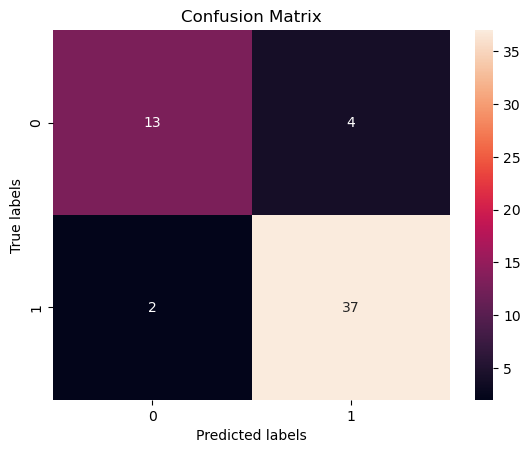


 Knn Classification Report:2025-08-05 07:42:59
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.90      0.95      0.93        39

    accuracy                           0.89        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.89      0.89      0.89        56

 
 === The RF Model Evaluation == 


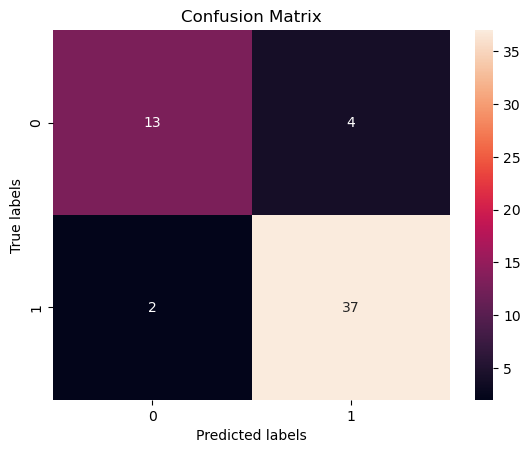


 RF Classification Report:2025-08-05 07:43:22
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.90      0.95      0.93        39

    accuracy                           0.89        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.89      0.89      0.89        56



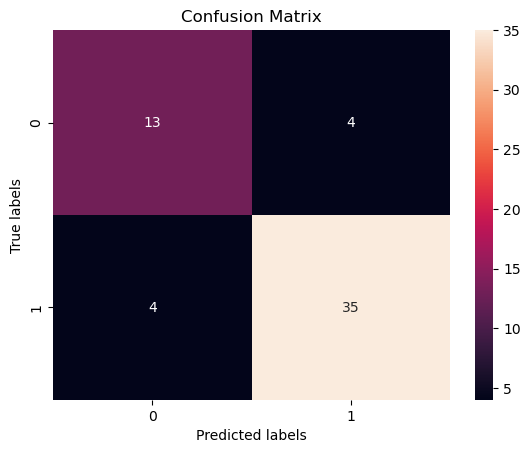


 DT Classification Report:2025-08-05 07:43:23
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.90      0.90      0.90        39

    accuracy                           0.86        56
   macro avg       0.83      0.83      0.83        56
weighted avg       0.86      0.86      0.86        56



In [19]:
#no optimization

testAcc=test_accuracy(False, None, train_data, test_data, trainy, testy,data_set_lables,data_set_name,method)

itemknn={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'KNN', 'acc':testAcc['knn'][0], 'precision':(testAcc['knn'][1]), 'recall':(testAcc['knn'][2]), 'f1':(testAcc['knn'][3]), 'auc':(testAcc['knn'][4]), 'cr':(testAcc['knn'][5]), 'cm':(testAcc['knn'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemknn, "mammo", metrics_dir)

itemrf={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'RF', 'acc':testAcc['rf'][0], 'precision':(testAcc['rf'][1]), 'recall':(testAcc['rf'][2]), 'f1':(testAcc['rf'][3]), 'auc':(testAcc['rf'][4]), 'cr':(testAcc['rf'][5]), 'cm':(testAcc['rf'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemrf, "mammo", metrics_dir)

itemmlp={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'MLP', 'acc':testAcc['mlp'][0], 'precision':(testAcc['mlp'][1]), 'recall':(testAcc['mlp'][2]), 'f1':(testAcc['mlp'][3]), 'auc':(testAcc['mlp'][4]), 'cr':(testAcc['mlp'][5]), 'cm':(testAcc['mlp'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemmlp, "mammo", metrics_dir)

itemdt={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'DTree', 'acc':testAcc['dt'][0], 'precision':(testAcc['dt'][1]), 'recall':(testAcc['dt'][2]), 'f1':(testAcc['dt'][3]), 'auc':(testAcc['dt'][4]), 'cr':(testAcc['dt'][5]), 'cm':(testAcc['dt'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemdt, "mammo", metrics_dir)

itemsvm={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'SVM', 'acc':testAcc['svm'][0], 'precision':(testAcc['svm'][1]), 'recall':(testAcc['svm'][2]), 'f1':(testAcc['svm'][3]), 'auc':(testAcc['svm'][4]), 'cr':(testAcc['svm'][5]), 'cm':(testAcc['svm'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemsvm, "mammo", metrics_dir)

itemgnb={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'GNB', 'acc':testAcc['gnb'][0], 'precision':(testAcc['gnb'][1]), 'recall':(testAcc['gnb'][2]), 'f1':(testAcc['gnb'][3]), 'auc':(testAcc['gnb'][4]), 'cr':(testAcc['gnb'][5]), 'cm':(testAcc['gnb'][6]), 'selectedFeatures':([1]),'using':'row_data',"fitness_curve":[]}
save_results_to_csv(itemgnb, "mammo", metrics_dir)

Running perform_hbeosa_AEO_optimisation...
425
about to  start the hbeosa
ebola evolution has started to create initials human and non-human carriers of the pandemic 😳 🙆‍♂️ 🦧


C:\Users\jnann\AppData\Local\Temp\ipykernel_18452\3034429475.py:51: RuntimeWarning: invalid value encountered in divide
  self.ys=(self.ys - np.min(self.ys)) / (np.max(self.ys) - np.min(self.ys))
C:\Users\jnann\AppData\Local\Temp\ipykernel_18452\3034429475.py:51: RuntimeWarning: invalid value encountered in divide
  self.ys=(self.ys - np.min(self.ys)) / (np.max(self.ys) - np.min(self.ys))


after compartmental models and subtractions number of infected is:  2
[np.float64(0.07138095238095235), np.float64(0.07171428571428569), np.float64(0.07204761904761903), np.float64(0.07204761904761903), np.float64(0.07271428571428569), np.float64(0.07304761904761903), np.float64(0.07338095238095235), np.float64(0.07404761904761903), np.float64(0.07404761904761903), np.float64(0.07404761904761903)]
Iteration  0 : Best Fit =  0.07138095238095235
after compartmental models and subtractions number of infected is:  1
[np.float64(0.07138095238095235), np.float64(0.07171428571428569), np.float64(0.07204761904761903), np.float64(0.07204761904761903), np.float64(0.07271428571428569), np.float64(0.07304761904761903), np.float64(0.07338095238095235), np.float64(0.07404761904761903), np.float64(0.07404761904761903), np.float64(0.07404761904761903)]
Iteration  1 : Best Fit =  0.07138095238095235
after compartmental models and subtractions number of infected is:  2
[np.float64(0.07138095238095235), 

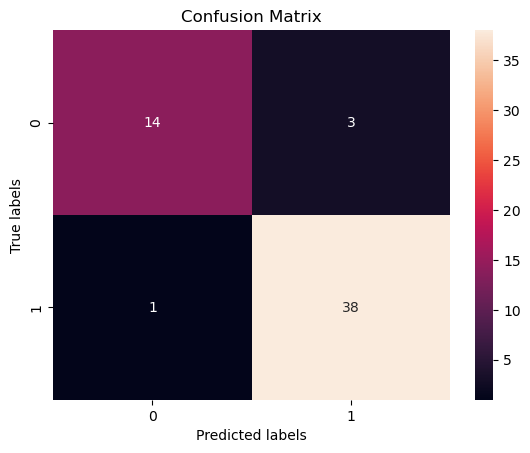


 Knn Classification Report:2025-08-05 08:01:21
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.93      0.97      0.95        39

    accuracy                           0.93        56
   macro avg       0.93      0.90      0.91        56
weighted avg       0.93      0.93      0.93        56

 
 === The RF Model Evaluation == 


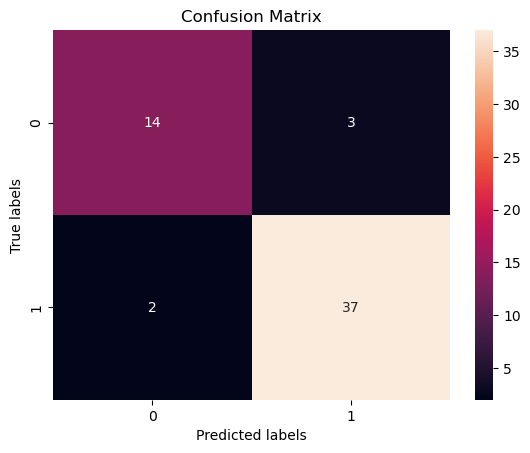


 RF Classification Report:2025-08-05 08:01:43
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.93      0.95      0.94        39

    accuracy                           0.91        56
   macro avg       0.90      0.89      0.89        56
weighted avg       0.91      0.91      0.91        56



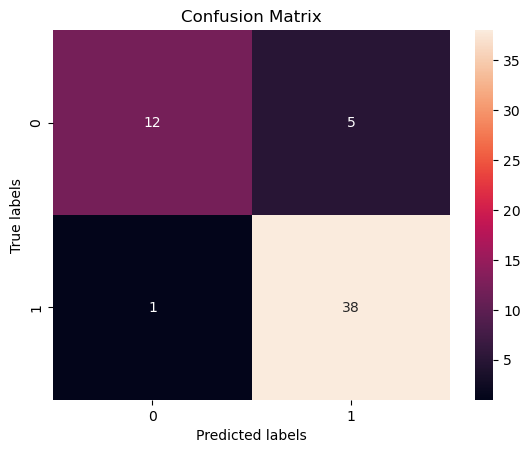


 DT Classification Report:2025-08-05 08:01:43
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.88      0.97      0.93        39

    accuracy                           0.89        56
   macro avg       0.90      0.84      0.86        56
weighted avg       0.90      0.89      0.89        56

===... Accuracy Evaluation ---===
actual feature set size : 30
===== Using features selected for individual images=== 
selected feature set size:  30
Data Set structure  
 train feature set (425, 30) train label set  (425, 2) 
 evaluation feature set (56, 30) evaluation label set  (56, 2)

=== The KNN Model Evaluation == 


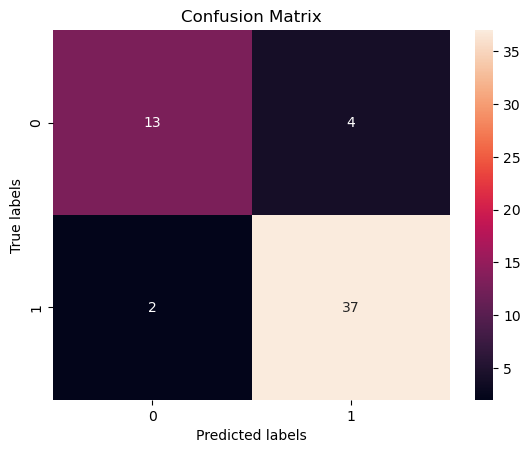


 Knn Classification Report:2025-08-05 08:01:44
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.90      0.95      0.93        39

    accuracy                           0.89        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.89      0.89      0.89        56

 
 === The RF Model Evaluation == 


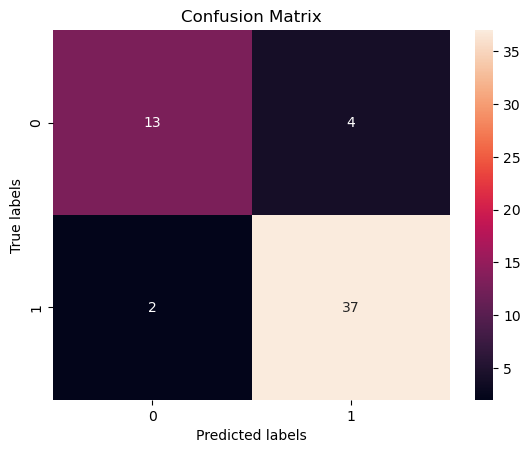


 RF Classification Report:2025-08-05 08:02:07
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.90      0.95      0.93        39

    accuracy                           0.89        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.89      0.89      0.89        56



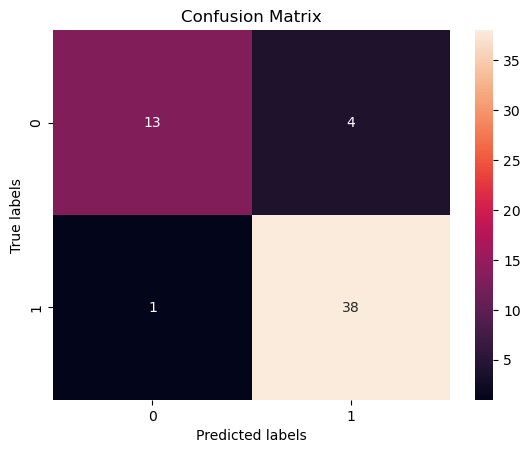


 DT Classification Report:2025-08-05 08:02:07
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.90      0.97      0.94        39

    accuracy                           0.91        56
   macro avg       0.92      0.87      0.89        56
weighted avg       0.91      0.91      0.91        56

Running perform_hbeosa_AEO_nt_optimisation...
425
about to  start the hbeosa
ebola evolution has started to create initials human and non-human carriers of the pandemic 😳 🙆‍♂️ 🦧


C:\Users\jnann\AppData\Local\Temp\ipykernel_18452\3034429475.py:51: RuntimeWarning: invalid value encountered in divide
  self.ys=(self.ys - np.min(self.ys)) / (np.max(self.ys) - np.min(self.ys))
C:\Users\jnann\AppData\Local\Temp\ipykernel_18452\3034429475.py:51: RuntimeWarning: invalid value encountered in divide
  self.ys=(self.ys - np.min(self.ys)) / (np.max(self.ys) - np.min(self.ys))


after compartmental models and subtractions number of infected is:  3
[np.float64(0.038023809523809515), np.float64(0.05603571428571432), np.float64(0.05703571428571432), np.float64(0.05703571428571432), np.float64(0.07171428571428569), np.float64(0.07204761904761903), np.float64(0.07204761904761903), np.float64(0.07204761904761903), np.float64(0.07271428571428569), np.float64(0.07304761904761903)]
Iteration  0 : Best Fit =  0.038023809523809515
after compartmental models and subtractions number of infected is:  2
[np.float64(0.038023809523809515), np.float64(0.05603571428571432), np.float64(0.05703571428571432), np.float64(0.05703571428571432), np.float64(0.07171428571428569), np.float64(0.07204761904761903), np.float64(0.07204761904761903), np.float64(0.07204761904761903), np.float64(0.07271428571428569), np.float64(0.07304761904761903)]
Iteration  1 : Best Fit =  0.038023809523809515
after compartmental models and subtractions number of infected is:  3
[np.float64(0.0380238095238095

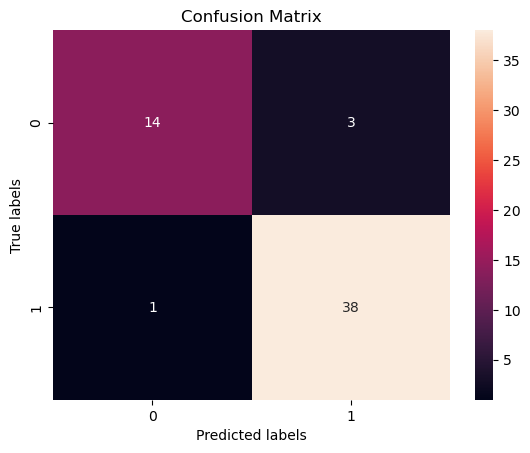


 Knn Classification Report:2025-08-05 08:28:44
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.93      0.97      0.95        39

    accuracy                           0.93        56
   macro avg       0.93      0.90      0.91        56
weighted avg       0.93      0.93      0.93        56

 
 === The RF Model Evaluation == 


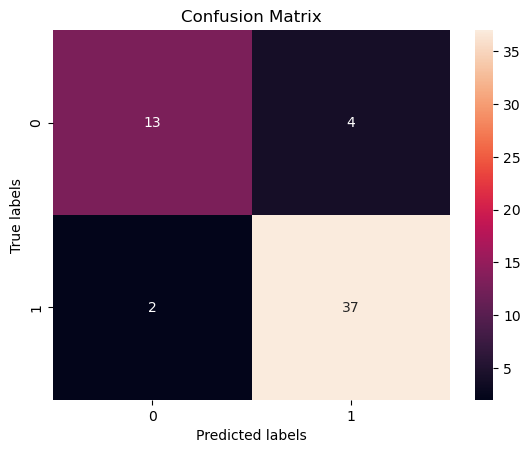


 RF Classification Report:2025-08-05 08:29:12
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.90      0.95      0.93        39

    accuracy                           0.89        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.89      0.89      0.89        56



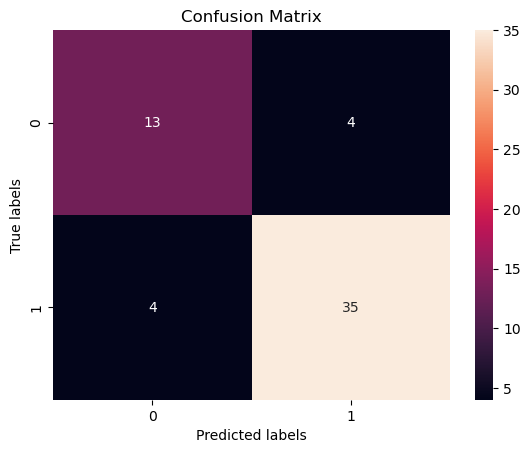


 DT Classification Report:2025-08-05 08:29:12
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.90      0.90      0.90        39

    accuracy                           0.86        56
   macro avg       0.83      0.83      0.83        56
weighted avg       0.86      0.86      0.86        56

===... Accuracy Evaluation ---===
actual feature set size : 30
===== Using features selected for individual images=== 
selected feature set size:  30
Data Set structure  
 train feature set (425, 30) train label set  (425, 2) 
 evaluation feature set (56, 30) evaluation label set  (56, 2)

=== The KNN Model Evaluation == 


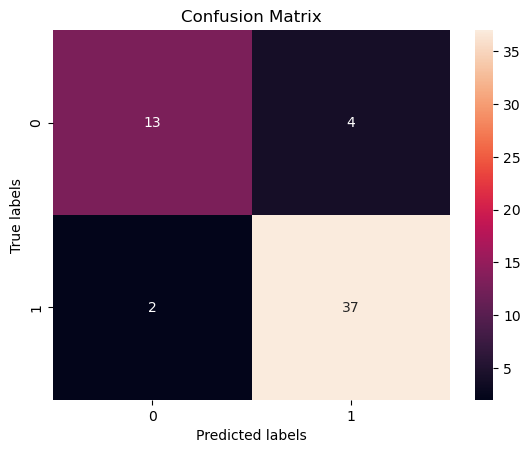


 Knn Classification Report:2025-08-05 08:29:14
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.90      0.95      0.93        39

    accuracy                           0.89        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.89      0.89      0.89        56

 
 === The RF Model Evaluation == 


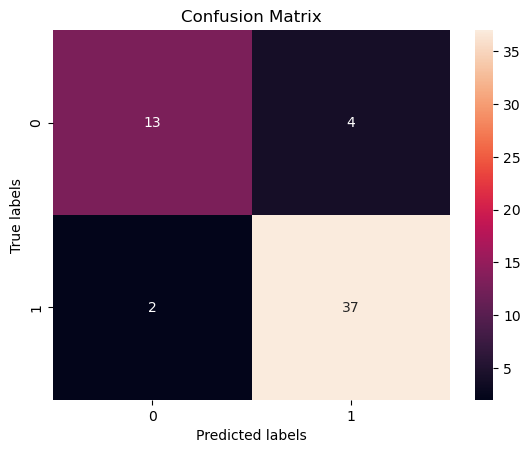


 RF Classification Report:2025-08-05 08:29:44
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.90      0.95      0.93        39

    accuracy                           0.89        56
   macro avg       0.88      0.86      0.87        56
weighted avg       0.89      0.89      0.89        56



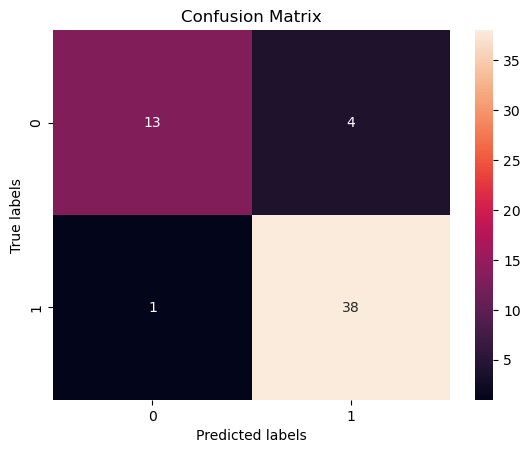


 DT Classification Report:2025-08-05 08:29:45
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.90      0.97      0.94        39

    accuracy                           0.91        56
   macro avg       0.92      0.87      0.89        56
weighted avg       0.91      0.91      0.91        56



In [20]:
# List of optimization functions
optimisation_functions = [
    # perform_hbeosa_dmo_optimisation,
    # perform_hbeosa_dmo_nt_optimisation,
    # perform_hbeosa_pso_optimisation,
     #perform_hbeosa_pso_nt_optimisation,
    # perform_hbeosa_aco_optimisation,
    # perform_hbeosa_aco_nt_optimisation,
    # perform_hbeosa_sa_optimisation,
    # perform_hbeosa_sa_nt_optimisation,
    # perform_hbeosa_ffa_optimisation,
    # perform_hbeosa_ffa_nt_optimisation,
     perform_hbeosa_AEO_optimisation,
     perform_hbeosa_AEO_nt_optimisation,
    # perform_hbeosa_afsa2_optimisation,
    # perform_hbeosa_afsa2_nt_optimisation,
    # perform_hbeosa_soa_optimisation,
    # perform_hbeosa_soa_nt_optimisation,
    # perform_hbeosa_snake_optimisation,
    # perform_hbeosa_snake_nt_optimisation,
    # perform_hbeosa_bso_optimisation,
    # perform_hbeosa_bso_nt_optimisation
]

save_best_features_path = [
    './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_AEO_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_AEO_NT_selected_best_features.npy',
    # './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_AFSA2_selected_best_features.npy',
    # './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_AFSA2_NT_selected_best_features.npy',
    # './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_SOA_selected_best_features.npy',
    # './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_SOA_NT_selected_best_features.npy',
    # './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_SNAKE_selected_best_features.npy',
    # './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_SNAKE_NT_selected_best_features.npy',
    # './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_BSO_selected_best_features.npy',
    # './outputs/checkpoints/optimised_features/selected_best/breastEW_BEOSA_BSO_NT_selected_best_features.npy'
]

# Loop through each optimisation function
for i, optimisation_function in enumerate(optimisation_functions):
    # Perform the optimisation
    print(f"Running {optimisation_function.__name__}...")
    new_x_train, y_train, optimised_train_data_path, optimised_train_labels_path, best_selected_features = optimisation_function(
        './outputs/checkpoints/original_text_data_features/breastEW_train_data.npy',
        './outputs/checkpoints/original_text_data_features/breastEW_train_label.npy',
        './outputs/checkpoints/original_text_data_features/breastEW_eval_data.npy',
        './outputs/checkpoints/original_text_data_features/breastEW_eval_label.npy',
        data_set_labels,
        data_set_name
    )

    # Save the best selected features
    np.save(save_best_features_path[i], best_selected_features)

# congress EW

In [ ]:
#Discription of imagebased dataset
data_set_labels =['0','1']
data_set_name = "CongressEW"
#no optimization model results
orginal_data_dir = './outputs/' +'checkpoints/original_text_data_features/CongressEW_'
train_data = np.load(orginal_data_dir+"train_data.npy")
trainy = np.load(orginal_data_dir+"train_label.npy")
testy = np.load(orginal_data_dir+"eval_label.npy")
test_data = np.load(orginal_data_dir+"eval_data.npy")
whole_feat=np.concatenate((train_data,test_data))
whole_label=np.concatenate((trainy,testy))        
lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]


data_set_lables = ['0','1'] 
data_set_name = 'CongressEW' 
folder = './outputs/results/metrics/'

In [ ]:
#no optimization
method="no_optimization"  

testAcc=test_accuracy(False, None, train_data, test_data, trainy, testy,data_set_lables,data_set_name,method)

itemknn={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'KNN', 'acc':testAcc['knn'][0], 'precision':(testAcc['knn'][1]), 'recall':(testAcc['knn'][2]), 'f1':(testAcc['knn'][3]), 'auc':(testAcc['knn'][4]), 'cr':(testAcc['knn'][5]), 'cm':(testAcc['knn'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemknn, "mammo", metrics_dir)

itemrf={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'RF', 'acc':testAcc['rf'][0], 'precision':(testAcc['rf'][1]), 'recall':(testAcc['rf'][2]), 'f1':(testAcc['rf'][3]), 'auc':(testAcc['rf'][4]), 'cr':(testAcc['rf'][5]), 'cm':(testAcc['rf'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemrf, "mammo", metrics_dir)

itemmlp={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"%%HTML",'type':'final', 'classifier':'MLP', 'acc':testAcc['mlp'][0], 'precision':(testAcc['mlp'][1]), 'recall':(testAcc['mlp'][2]), 'f1':(testAcc['mlp'][3]), 'auc':(testAcc['mlp'][4]), 'cr':(testAcc['mlp'][5]), 'cm':(testAcc['mlp'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemmlp, "mammo", metrics_dir)

itemdt={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'DTree', 'acc':testAcc['dt'][0], 'precision':(testAcc['dt'][1]), 'recall':(testAcc['dt'][2]), 'f1':(testAcc['dt'][3]), 'auc':(testAcc['dt'][4]), 'cr':(testAcc['dt'][5]), 'cm':(testAcc['dt'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemdt, "mammo", metrics_dir)

itemsvm={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'SVM', 'acc':testAcc['svm'][0], 'precision':(testAcc['svm'][1]), 'recall':(testAcc['svm'][2]), 'f1':(testAcc['svm'][3]), 'auc':(testAcc['svm'][4]), 'cr':(testAcc['svm'][5]), 'cm':(testAcc['svm'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemsvm, "mammo", metrics_dir)

itemgnb={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'GNB', 'acc':testAcc['gnb'][0], 'precision':(testAcc['gnb'][1]), 'recall':(testAcc['gnb'][2]), 'f1':(testAcc['gnb'][3]), 'auc':(testAcc['gnb'][4]), 'cr':(testAcc['gnb'][5]), 'cm':(testAcc['gnb'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemgnb, "mammo", metrics_dir)

In [ ]:
# apply optimisation techniques
# List of optimization functions
optimisation_functions = [
    perform_hbeosa_dmo_optimisation,
    perform_hbeosa_dmo_nt_optimisation,
    perform_hbeosa_pso_optimisation,
    perform_hbeosa_pso_nt_optimisation,
    perform_hbeosa_aco_optimisation,
    perform_hbeosa_aco_nt_optimisation,
    perform_hbeosa_sa_optimisation,
    perform_hbeosa_sa_nt_optimisation,
    perform_hbeosa_ffa_optimisation,
    perform_hbeosa_ffa_nt_optimisation,
    perform_hbeosa_AEO_optimisation,
    perform_hbeosa_AEO_nt_optimisation,
    perform_hbeosa_afsa2_optimisation,
    perform_hbeosa_afsa2_nt_optimisation,
    perform_hbeosa_soa_optimisation,
    perform_hbeosa_soa_nt_optimisation,
    perform_hbeosa_snake_optimisation,
    perform_hbeosa_snake_nt_optimisation
]

save_best_features_path = [
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_DMO_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_DMO_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_PSO_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_PSO_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_ACO_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_ACO_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_SA_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_SA_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_FFA_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_FFA_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_AEO_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_AEO_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_AFSA2_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_AFSA2_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_SOA_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_SOA_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_SNAKE_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/congressEW_BEOSA_SNAKE_NT_selected_best_features.npy'
]

# Loop through each optimisation function
for i, optimisation_function in enumerate(optimisation_functions):
    # Perform the optimisation
    print(f"Running {optimisation_function.__name__}...")
    new_x_train, y_train, optimised_train_data_path, optimised_train_labels_path, best_selected_features = optimisation_function(
        './outputs/checkpoints/original_text_data_features/CongressEW_train_data.npy',
        './outputs/checkpoints/original_text_data_features/CongressEW_train_label.npy',
        './outputs/checkpoints/original_text_data_features/CongressEW_eval_data.npy',
        './outputs/checkpoints/original_text_data_features/CongressEW_eval_label.npy',
        data_set_labels,
        data_set_name
    )

    # Save the best selected features
    np.save(save_best_features_path[i], best_selected_features)

# Sonar

In [ ]:
#Discription of imagebased dataset
data_set_labels =['0','1']
data_set_name = "Sonar"
#no optimization model results
orginal_data_dir = './outputs/' +'checkpoints/original_text_data_features/Sonar_'
train_data = np.load(orginal_data_dir+"train_data.npy")
trainy = np.load(orginal_data_dir+"train_label.npy")
testy = np.load(orginal_data_dir+"eval_label.npy")
test_data = np.load(orginal_data_dir+"eval_data.npy")
whole_feat=np.concatenate((train_data,test_data))
whole_label=np.concatenate((trainy,testy))        
lb, ub=whole_feat.shape[1]//8, whole_feat.shape[1]


data_set_lables = ['0','1'] 
data_set_name = 'Sonar' 
folder = './outputs/results/metrics/'

In [ ]:
#no optimization
method="no_optimization"  
testAcc=test_accuracy(False, None, train_data, test_data, trainy, testy,data_set_lables,data_set_name,method)

itemknn={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'KNN', 'acc':testAcc['knn'][0], 'precision':(testAcc['knn'][1]), 'recall':(testAcc['knn'][2]), 'f1':(testAcc['knn'][3]), 'auc':(testAcc['knn'][4]), 'cr':(testAcc['knn'][5]), 'cm':(testAcc['knn'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemknn, "mammo", metrics_dir)

itemrf={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'RF', 'acc':testAcc['rf'][0], 'precision':(testAcc['rf'][1]), 'recall':(testAcc['rf'][2]), 'f1':(testAcc['rf'][3]), 'auc':(testAcc['rf'][4]), 'cr':(testAcc['rf'][5]), 'cm':(testAcc['rf'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemrf, "mammo", metrics_dir)

itemmlp={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"%%HTML",'type':'final', 'classifier':'MLP', 'acc':testAcc['mlp'][0], 'precision':(testAcc['mlp'][1]), 'recall':(testAcc['mlp'][2]), 'f1':(testAcc['mlp'][3]), 'auc':(testAcc['mlp'][4]), 'cr':(testAcc['mlp'][5]), 'cm':(testAcc['mlp'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemmlp, "mammo", metrics_dir)

itemdt={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'DTree', 'acc':testAcc['dt'][0], 'precision':(testAcc['dt'][1]), 'recall':(testAcc['dt'][2]), 'f1':(testAcc['dt'][3]), 'auc':(testAcc['dt'][4]), 'cr':(testAcc['dt'][5]), 'cm':(testAcc['dt'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemdt, "mammo", metrics_dir)

itemsvm={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'SVM', 'acc':testAcc['svm'][0], 'precision':(testAcc['svm'][1]), 'recall':(testAcc['svm'][2]), 'f1':(testAcc['svm'][3]), 'auc':(testAcc['svm'][4]), 'cr':(testAcc['svm'][5]), 'cm':(testAcc['svm'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemsvm, "mammo", metrics_dir)

itemgnb={"Date":(datetime.now().strftime('%Y-%m-%d %H:%M:%S')),'Dataset':data_set_name,'method':method, 'threshold_only':"",'type':'final', 'classifier':'GNB', 'acc':testAcc['gnb'][0], 'precision':(testAcc['gnb'][1]), 'recall':(testAcc['gnb'][2]), 'f1':(testAcc['gnb'][3]), 'auc':(testAcc['gnb'][4]), 'cr':(testAcc['gnb'][5]), 'cm':(testAcc['gnb'][6]), 'selectedFeatures':([1]),'using':'row_data'}
save_results_to_csv(itemgnb, "mammo", metrics_dir)

•• optimisation

In [ ]:
# apply optimisation techniques
# List of optimization functions
optimisation_functions = [
    perform_hbeosa_dmo_optimisation,
    perform_hbeosa_dmo_nt_optimisation,
    perform_hbeosa_pso_optimisation,
    perform_hbeosa_pso_nt_optimisation,
    perform_hbeosa_aco_optimisation,
    perform_hbeosa_aco_nt_optimisation,
    perform_hbeosa_sa_optimisation,
    perform_hbeosa_sa_nt_optimisation,
    perform_hbeosa_ffa_optimisation,
    perform_hbeosa_ffa_nt_optimisation,
    perform_hbeosa_AEO_optimisation,
    perform_hbeosa_AEO_nt_optimisation,
    perform_hbeosa_afsa2_optimisation,
    perform_hbeosa_afsa2_nt_optimisation,
    perform_hbeosa_soa_optimisation,
    perform_hbeosa_soa_nt_optimisation,
    perform_hbeosa_snake_optimisation,
    perform_hbeosa_snake_nt_optimisation
]

save_best_features_path = [
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_DMO_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_DMO_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_PSO_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_PSO_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_ACO_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_ACO_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_SA_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_SA_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_FFA_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_FFA_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_AEO_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_AEO_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_AFSA2_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_AFSA2_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_SOA_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_SOA_NT_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_SNAKE_selected_best_features.npy',
    './outputs/checkpoints/optimised_features/selected_best/Sonar_BEOSA_SNAKE_NT_selected_best_features.npy'
]

# Loop through each optimisation function
for i, optimisation_function in enumerate(optimisation_functions):
    # Perform the optimisation
    print(f"Running {optimisation_function.__name__}...")
    new_x_train, y_train, optimised_train_data_path, optimised_train_labels_path, best_selected_features = optimisation_function(
        './outputs/checkpoints/original_text_data_features/Sonar_train_data.npy',
        './outputs/checkpoints/original_text_data_features/Sonar_train_label.npy',
        './outputs/checkpoints/original_text_data_features/Sonar_eval_data.npy',
        './outputs/checkpoints/original_text_data_features/Sonar_eval_label.npy',
        data_set_labels,
        data_set_name
    )

    # Save the best selected features
    np.save(save_best_features_path[i], best_selected_features)

# testing Functions

In [ ]:
# comparism of ODEINT AND ODE45 COMPUTATIONS RESULTS
# Example usage:
if __name__ == "__main__":
    # Example parameters
    test_diffparams = {
        "epoch": 100,
        "S": [1000] * 100,  # Example susceptible population
        "I": [10] * 50,     # Example infected population
        "H": [0] * 15,      # Example hospitalized population
        "R": [0] * 15,      # Example recovered population
        "V": [0] * 10,      # Example vaccinated population
        "D": [0] * 10,      # Example dead population
        "PE": [5] * 20,     # Example pathogen environment
        "Q": []             # Example quarantine population
    }
    
    test_model_rates = {
        "recruitment_rate": 0.1,
        "decay_rate": 0.05,
        "hospitalization_rate": 0.2,
        "disease_induced_death_rate": 0.01,
        "contact_rate_infectious": 0.3,
        "contact_rate_pathogen": 0.1,
        "contact_rate_deceased": 0.05,
        "contact_rate_recovered": 0.02,
        "recovery_rate": 0.15,
        "natural_death_rate": 0.005,
        "burial_rate": 0.1,
        "vacination_rate": 0.08,
        "hospital_treatment_rate": 0.12,
        "vaccination_response_rate": 0.06,
        "quarantine_rate": 0.04
    }
    
    # Create ODE45 differential equation object
    test_de_ode45 = DiffEquationODE45(test_diffparams, test_model_rates)
    
    # Test the equations
    initial_susceptible = 100
    result_susceptible = ODE45equation6(test_de_ode45, initial_susceptible)
    print(f"Susceptible population over time: {result_susceptible[:10]}...")  # First 10 values
    
    initial_infected = 10
    result_infected = ODE45equation7(test_de_ode45, initial_infected)
    print(f"Infected population over time: {result_infected[:10]}...")  # First 10 values


    # Create ODE45 differential equation object
    testDE = DiffEquation(test_diffparams, test_model_rates)
    
    # Test the equations
    initial_susceptible = 100
    result_susceptible = equation6(testDE, initial_susceptible)
    print(f"Susceptible population over time: {result_susceptible[:10]}...")  # First 10 values
    
    initial_infected = 10
    result_infected = equation7(testDE, initial_infected)
    print(f"Infected population over time: {result_infected[:10]}...")  # First 10 values